## <font color=blue>1 - DATA UNDERSTANDING </font>

## 1.1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import missingno as msno
import scipy.stats as stats

from sklearn import tree
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import ks_2samp
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from statsmodels.stats.weightstats import ztest 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV # Test train ayarlamak için.
from sklearn.linear_model import LinearRegression


## 1.2. Load .csv Files

#### <font color=#FF0000>Ireland</font>

In [2]:
ireland_agriculture = pd.read_csv("ireland_crealdata.csv")
ireland_agriculture.head()

,Year,Barley_(million_ton),Wheat_(million_ton),Patotoes_(million_ton),Cereals_(million_ton)
0,2000,1.31,0.74,0.460,2.18
1,2001,1.28,0.77,0.480,2.17
2,2002,0.97,0.87,0.520,1.97
3,2003,1.20,0.80,0.490,2.15
4,2004,1.33,1.02,0.553,2.51


#### <font color=#FF0000>Belgium</font>

In [3]:
belgium_agriculture = pd.read_csv("belgium_crealdata.csv")
belgium_agriculture.head()

,Year,Barley_(million_ton),Wheat_(million_ton),Patotoes_(million_ton),Cereals_(million_ton)
0,2000,0.340,1.69,2.92,2.51
1,2001,0.370,1.46,2.56,2.36
2,2002,0.343,1.68,2.91,2.64
3,2003,0.271,1.64,2.52,2.56
4,2004,0.305,1.91,3.23,2.93


#### <font color=#FF0000>Netherlands</font>

In [4]:
netherlands_agriculture = pd.read_csv("netherlands_crealdata.csv")
netherlands_agriculture.head()

,Year,Barley_(million_ton),Wheat_(million_ton),Patotoes_(million_ton),Cereals_(million_ton)
0,2000,0.288,1.14,8.23,1.73
1,2001,0.390,0.99,7.12,1.67
2,2002,0.315,1.06,7.36,1.66
3,2003,0.349,1.13,6.47,1.74
4,2004,0.288,1.22,7.49,1.75


#### <font color=#FF0000>Number of People Working in Agriculture</font>

In [5]:
number_of_people = pd.read_csv("Number_of_People_Working_in_Agriculture.csv")
number_of_people.head()

,Year,Ireland,Belgium,Netherlands
0,2000,148559.0,84253.51744,267628.4816
1,2001,135541.0,59443.32038,259198.9201
2,2002,137193.0,77870.83375,248236.2882
3,2003,129773.0,75360.37367,257848.7536
4,2004,130569.0,99123.55629,282651.1230


## 1.3. Rename Columns

In [6]:
ireland_agriculture.rename(columns={'Barley_(million_ton)':'BarleyIreland'}, inplace=True)
ireland_agriculture.rename(columns={'Wheat_(million_ton)':'WheatIreland'}, inplace=True)
ireland_agriculture.rename(columns={'Patotoes_(million_ton)':'PotatoesIreland'}, inplace=True)
ireland_agriculture.rename(columns={'Cereals_(million_ton)':'CerealsIreland'}, inplace=True)

belgium_agriculture.rename(columns={'Barley_(million_ton)':'BarleyBelgium'}, inplace=True)
belgium_agriculture.rename(columns={'Wheat_(million_ton)':'WheatBelgium'}, inplace=True)
belgium_agriculture.rename(columns={'Patotoes_(million_ton)':'PotatoesBelgium'}, inplace=True)
belgium_agriculture.rename(columns={'Cereals_(million_ton)':'CerealsBelgium'}, inplace=True)

netherlands_agriculture.rename(columns={'Barley_(million_ton)':'BarleyNetherlands'}, inplace=True)
netherlands_agriculture.rename(columns={'Wheat_(million_ton)':'WheatNetherlands'}, inplace=True)
netherlands_agriculture.rename(columns={'Patotoes_(million_ton)':'PotatoesNetherlands'}, inplace=True)
netherlands_agriculture.rename(columns={'Cereals_(million_ton)':'CerealsNetherlands'}, inplace=True)


##  1.4. Observing and Describing Data

#### <font color=#FF0000>Ireland</font>

In [7]:
ireland_agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             21 non-null     int64  
 1   BarleyIreland    21 non-null     float64
 2   WheatIreland     21 non-null     float64
 3   PotatoesIreland  21 non-null     float64
 4   CerealsIreland   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 968.0 bytes


In [8]:
ireland_agriculture.shape
print("Ireland Agriculture Dataset - Shape:", ireland_agriculture.shape)

Ireland Agriculture Dataset - Shape: (21, 5)


In [9]:
print("Ireland Agriculture Dataset Summary")
ireland_agriculture.describe()

Ireland Agriculture Dataset Summary


,Year,BarleyIreland,WheatIreland,PotatoesIreland,CerealsIreland
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2010.000000,1.329048,0.728762,0.395286,2.215238
std,6.204837,0.211894,0.155570,0.077545,0.243816
min,2000.000000,0.970000,0.370000,0.240000,1.780000
25%,2005.000000,1.200000,0.670000,0.352000,2.040000
50%,2010.000000,1.290000,0.720000,0.390000,2.170000
75%,2015.000000,1.480000,0.801000,0.420000,2.400000
max,2020.000000,1.740000,1.020000,0.553000,2.640000


In [10]:
# Dublicate Data 
duplicate_rows_ireland_agriculture = ireland_agriculture[ireland_agriculture.duplicated()] 
print("Ireland Agriculture Dataset - Duplicate Data Shape:", duplicate_rows_ireland_agriculture.shape)

Ireland Agriculture Dataset - Duplicate Data Shape: (0, 5)


#### <font color=#FF0000>Belgium</font>

In [11]:
belgium_agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             21 non-null     int64  
 1   BarleyBelgium    21 non-null     float64
 2   WheatBelgium     21 non-null     float64
 3   PotatoesBelgium  21 non-null     float64
 4   CerealsBelgium   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 968.0 bytes


In [12]:
belgium_agriculture.shape
print("Belgium Agriculture Dataset - Shape:", belgium_agriculture.shape)

Belgium Agriculture Dataset - Shape: (21, 5)


In [13]:
print("Belgium Agriculture Dataset Summary")
belgium_agriculture.describe()

Belgium Agriculture Dataset Summary


,Year,BarleyBelgium,WheatBelgium,PotatoesBelgium,CerealsBelgium
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2010.000000,0.359476,1.749048,3.323333,2.799048
std,6.204837,0.044196,0.159997,0.583338,0.283724
min,2000.000000,0.271000,1.400000,2.520000,2.290000
25%,2005.000000,0.330000,1.660000,2.920000,2.570000
50%,2010.000000,0.360000,1.740000,3.230000,2.790000
75%,2015.000000,0.382000,1.850000,3.690000,3.040000
max,2020.000000,0.454000,2.020000,4.420000,3.260000


In [14]:
# Dublicate Data 
duplicate_rows_belgium_agriculture = belgium_agriculture[belgium_agriculture.duplicated()] 
print("Belgium Agriculture Dataset - Duplicate Data Shape:", duplicate_rows_belgium_agriculture.shape)

Belgium Agriculture Dataset - Duplicate Data Shape: (0, 5)


#### <font color=#FF0000>Netherlands</font>

In [15]:
netherlands_agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 21 non-null     int64  
 1   BarleyNetherlands    21 non-null     float64
 2   WheatNetherlands     21 non-null     float64
 3   PotatoesNetherlands  21 non-null     float64
 4   CerealsNetherlands   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 968.0 bytes


In [16]:
netherlands_agriculture.shape
print("Netherlands Agriculture Dataset - Shape:", netherlands_agriculture.shape)

Netherlands Agriculture Dataset - Shape: (21, 5)


In [17]:
print("Netherlands Agriculture Dataset Summary")
netherlands_agriculture.describe()

Netherlands Agriculture Dataset Summary


,Year,BarleyNetherlands,WheatNetherlands,PotatoesNetherlands,CerealsNetherlands
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2010.000000,0.262857,1.170095,6.945714,1.650952
std,6.204837,0.053432,0.144887,0.480100,0.180690
min,2000.000000,0.197000,0.932000,6.030000,1.320000
25%,2005.000000,0.208000,1.050000,6.650000,1.550000
50%,2010.000000,0.248000,1.170000,6.920000,1.670000
75%,2015.000000,0.307000,1.300000,7.180000,1.740000
max,2020.000000,0.390000,1.400000,8.230000,1.990000


In [18]:
# Dublicate Data 
duplicate_rows_netherlands_agriculture = netherlands_agriculture[netherlands_agriculture.duplicated()] 
print("Netherlands Agriculture Dataset - Duplicate Data Shape:", duplicate_rows_netherlands_agriculture.shape)

Netherlands Agriculture Dataset - Duplicate Data Shape: (0, 5)


#### <font color=#FF0000>Number of People Working in Agriculture</font>

In [19]:
number_of_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         21 non-null     int64  
 1   Ireland      20 non-null     float64
 2   Belgium      20 non-null     float64
 3   Netherlands  20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 800.0 bytes


In [20]:
number_of_people.shape
print("Number of People Working in Agriculture Dataset - Shape:", number_of_people.shape)

Number of People Working in Agriculture Dataset - Shape: (21, 4)


In [21]:
print("Number of People Working in Agriculture Dataset Summary")
number_of_people.describe()

Number of People Working in Agriculture Dataset Summary


,Year,Ireland,Belgium,Netherlands
count,21.000000,20.000000,20.000000,20.000000
mean,2010.000000,127303.900000,70307.197597,247045.014355
std,6.204837,8574.148691,14706.878330,39202.794652
min,2000.000000,107638.000000,47262.001670,188735.811500
25%,2005.000000,123216.500000,59336.554735,206445.060425
50%,2010.000000,128624.500000,66699.676930,253042.520900
75%,2015.000000,130614.500000,79466.504672,277314.722300
max,2020.000000,148559.000000,99123.556290,310327.958000


In [22]:
# Dublicate Data
duplicate_rows_number_of_people = number_of_people[number_of_people.duplicated()] 
print("Netherlands Agriculture Dataset - Duplicate Data Shape:", duplicate_rows_number_of_people.shape)

Netherlands Agriculture Dataset - Duplicate Data Shape: (0, 4)


### 1.5. Data Visualization

#### <font color=#FF0000>Ireland</font>

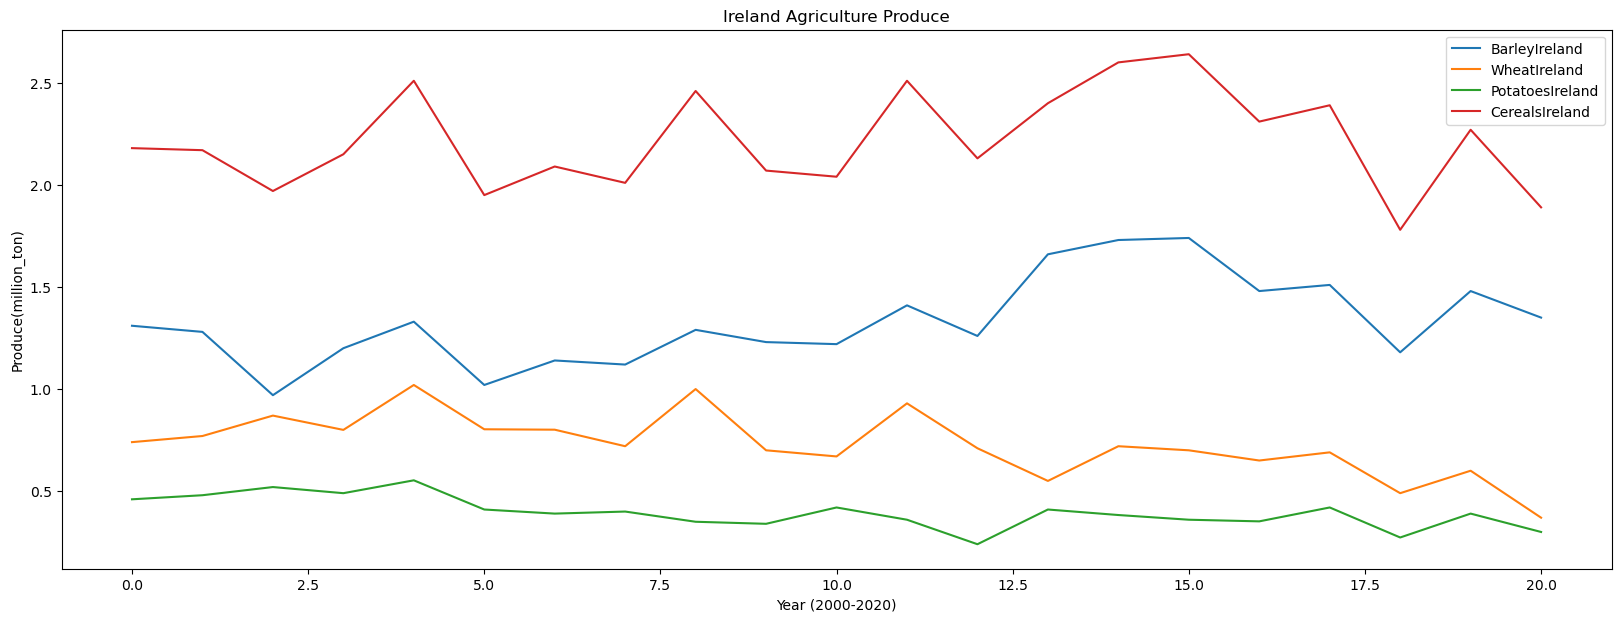

In [23]:
IrelandAgriculture = ireland_agriculture[["BarleyIreland", "WheatIreland", "PotatoesIreland", "CerealsIreland"]]
plt.rcParams["figure.figsize"] = (20,7)
IrelandAgriculture.plot()
plt.xlabel("Year (2000-2020)")
plt.ylabel("Produce(million_ton)")
plt.title("Ireland Agriculture Produce")
plt.show()

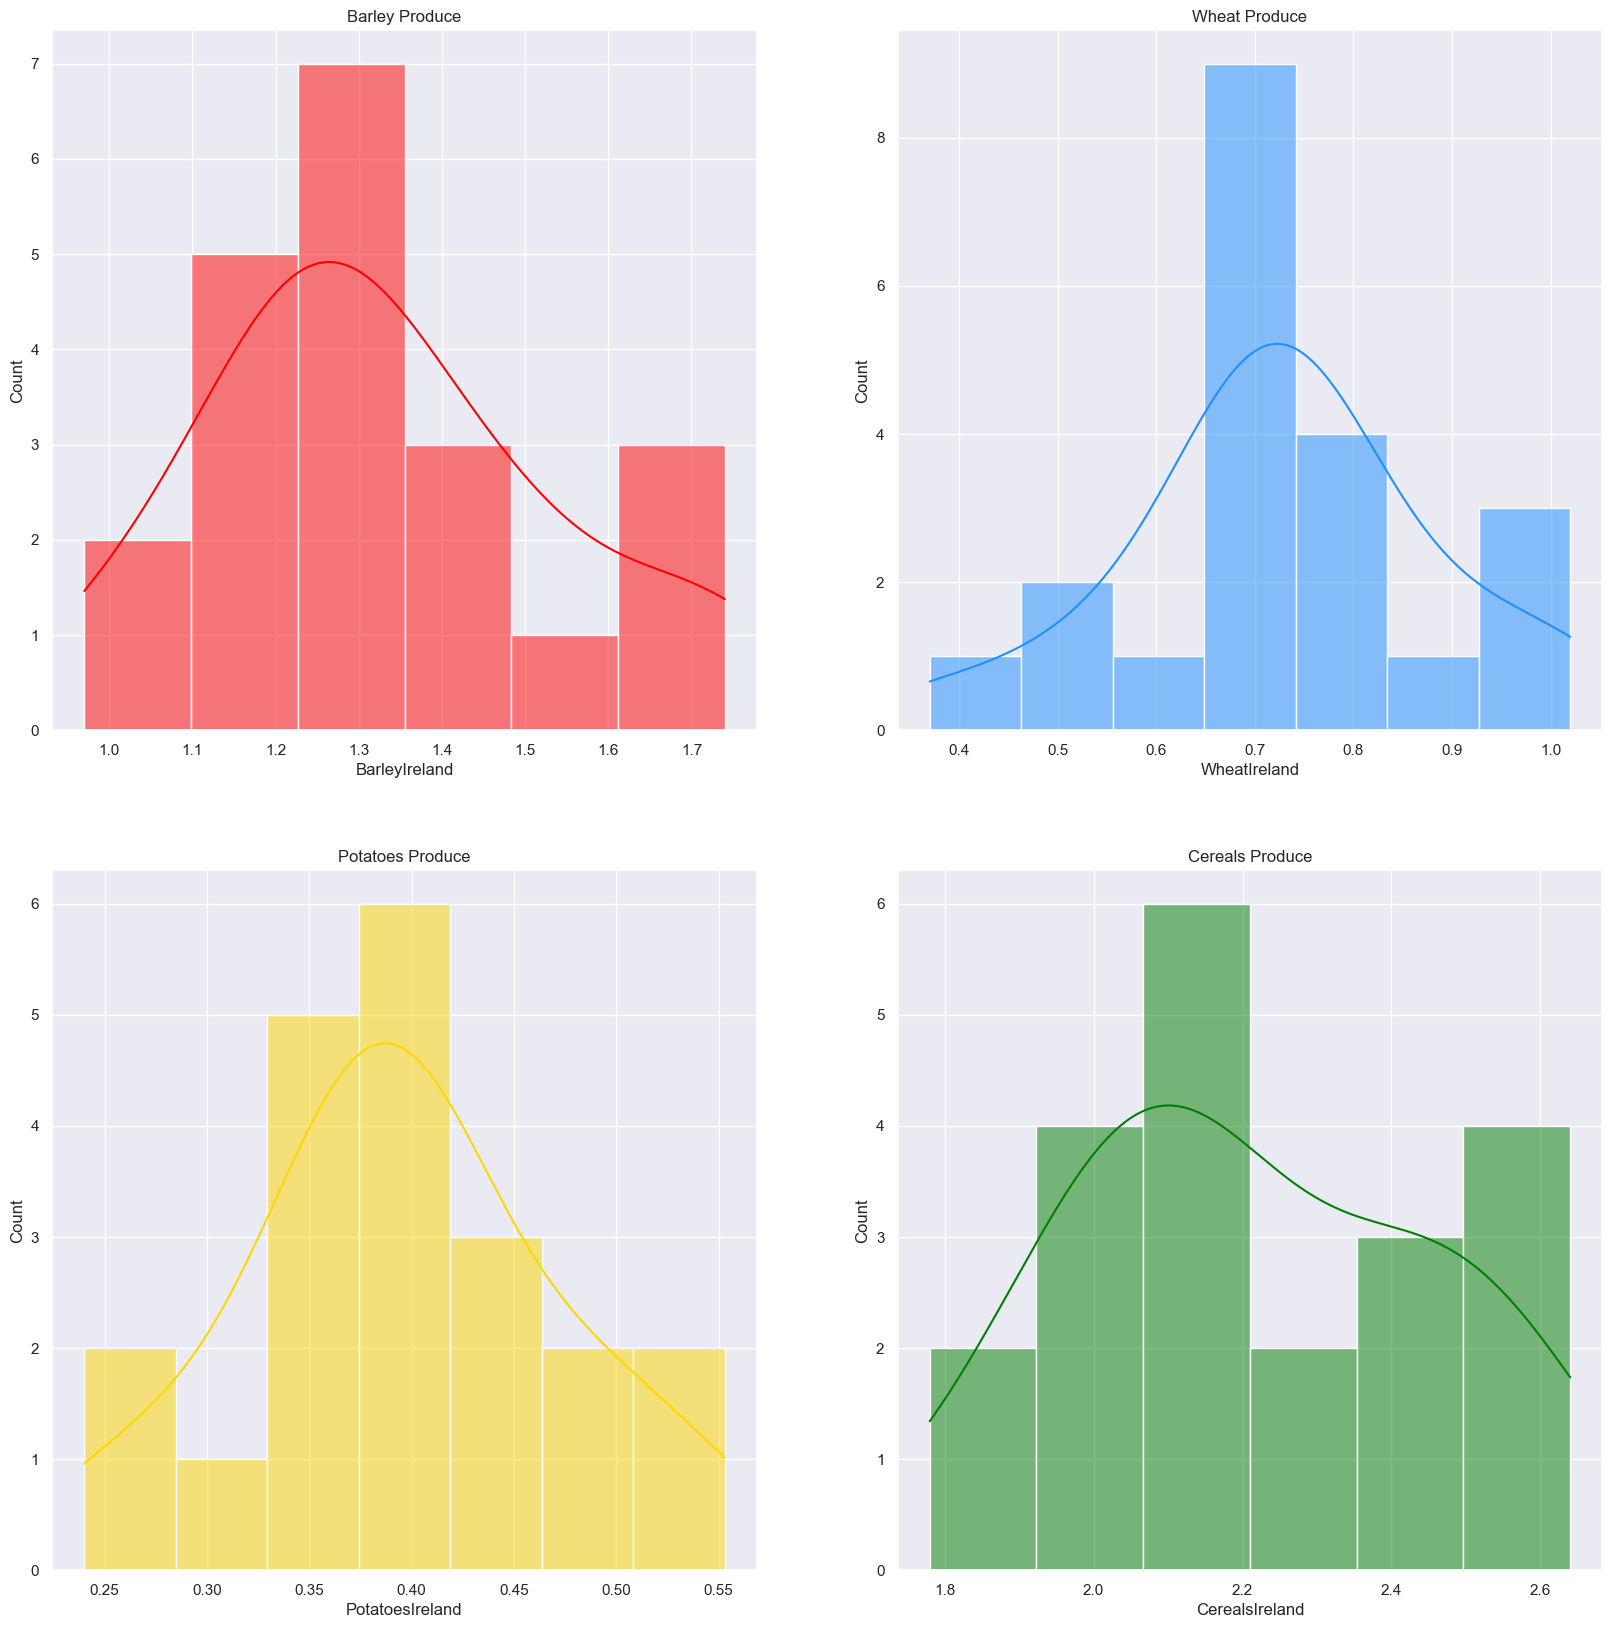

In [24]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(20,20))

sns.histplot(data=ireland_agriculture, x="BarleyIreland", kde=True,color="red", ax=axs[0, 0]).set(title ="Barley Produce")
sns.histplot(data=ireland_agriculture, x="WheatIreland", kde=True, color="dodgerblue",ax=axs[0, 1]).set(title ="Wheat Produce")
sns.histplot(data=ireland_agriculture, x="PotatoesIreland", kde=True, color="gold", ax=axs[1, 0]).set(title ="Potatoes Produce")
sns.histplot(data=ireland_agriculture, x="CerealsIreland", kde=True, color="green",ax=axs[1, 1]).set(title ="Cereals Produce")

plt.show()

Text(79.74999999999999, 0.5, 'Columns Name')

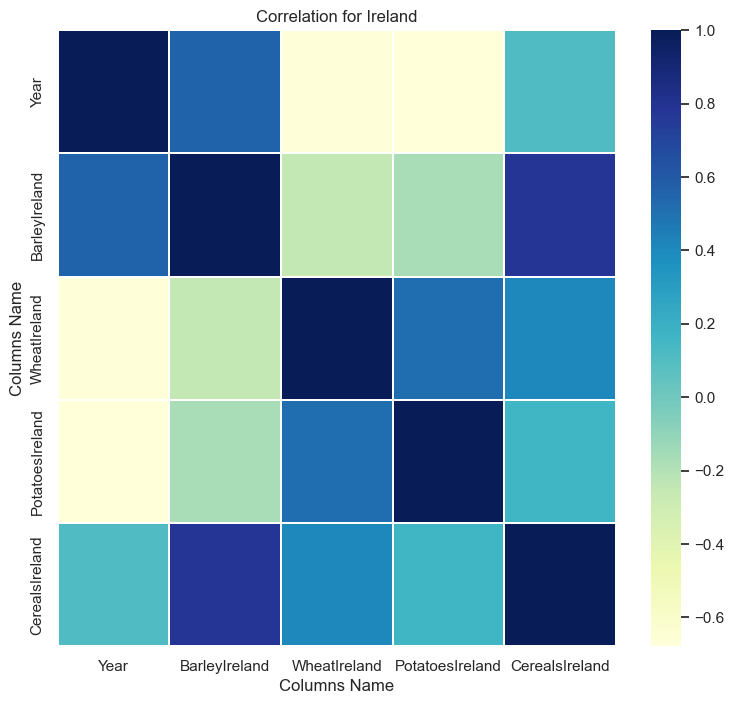

In [25]:
corrmat = ireland_agriculture.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1).set(title='Correlation for Ireland')
plt.xlabel("Columns Name")
plt.ylabel("Columns Name")

#### <font color=#FF0000>Belgium</font>

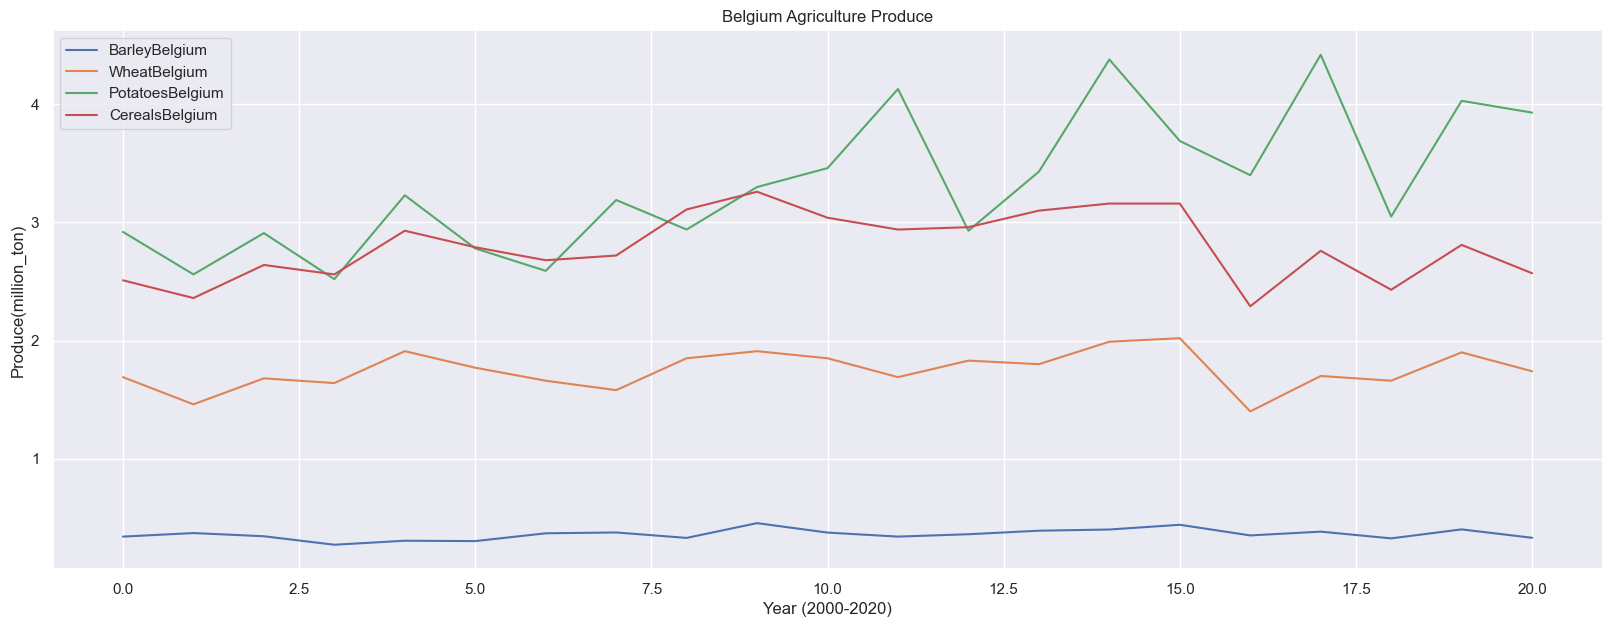

In [26]:
BelgiumAgriculture = belgium_agriculture[["BarleyBelgium", "WheatBelgium", "PotatoesBelgium", "CerealsBelgium"]]
plt.rcParams["figure.figsize"] = (20,7)
BelgiumAgriculture.plot()
plt.xlabel("Year (2000-2020)")
plt.ylabel("Produce(million_ton)")
plt.title("Belgium Agriculture Produce")
plt.show()

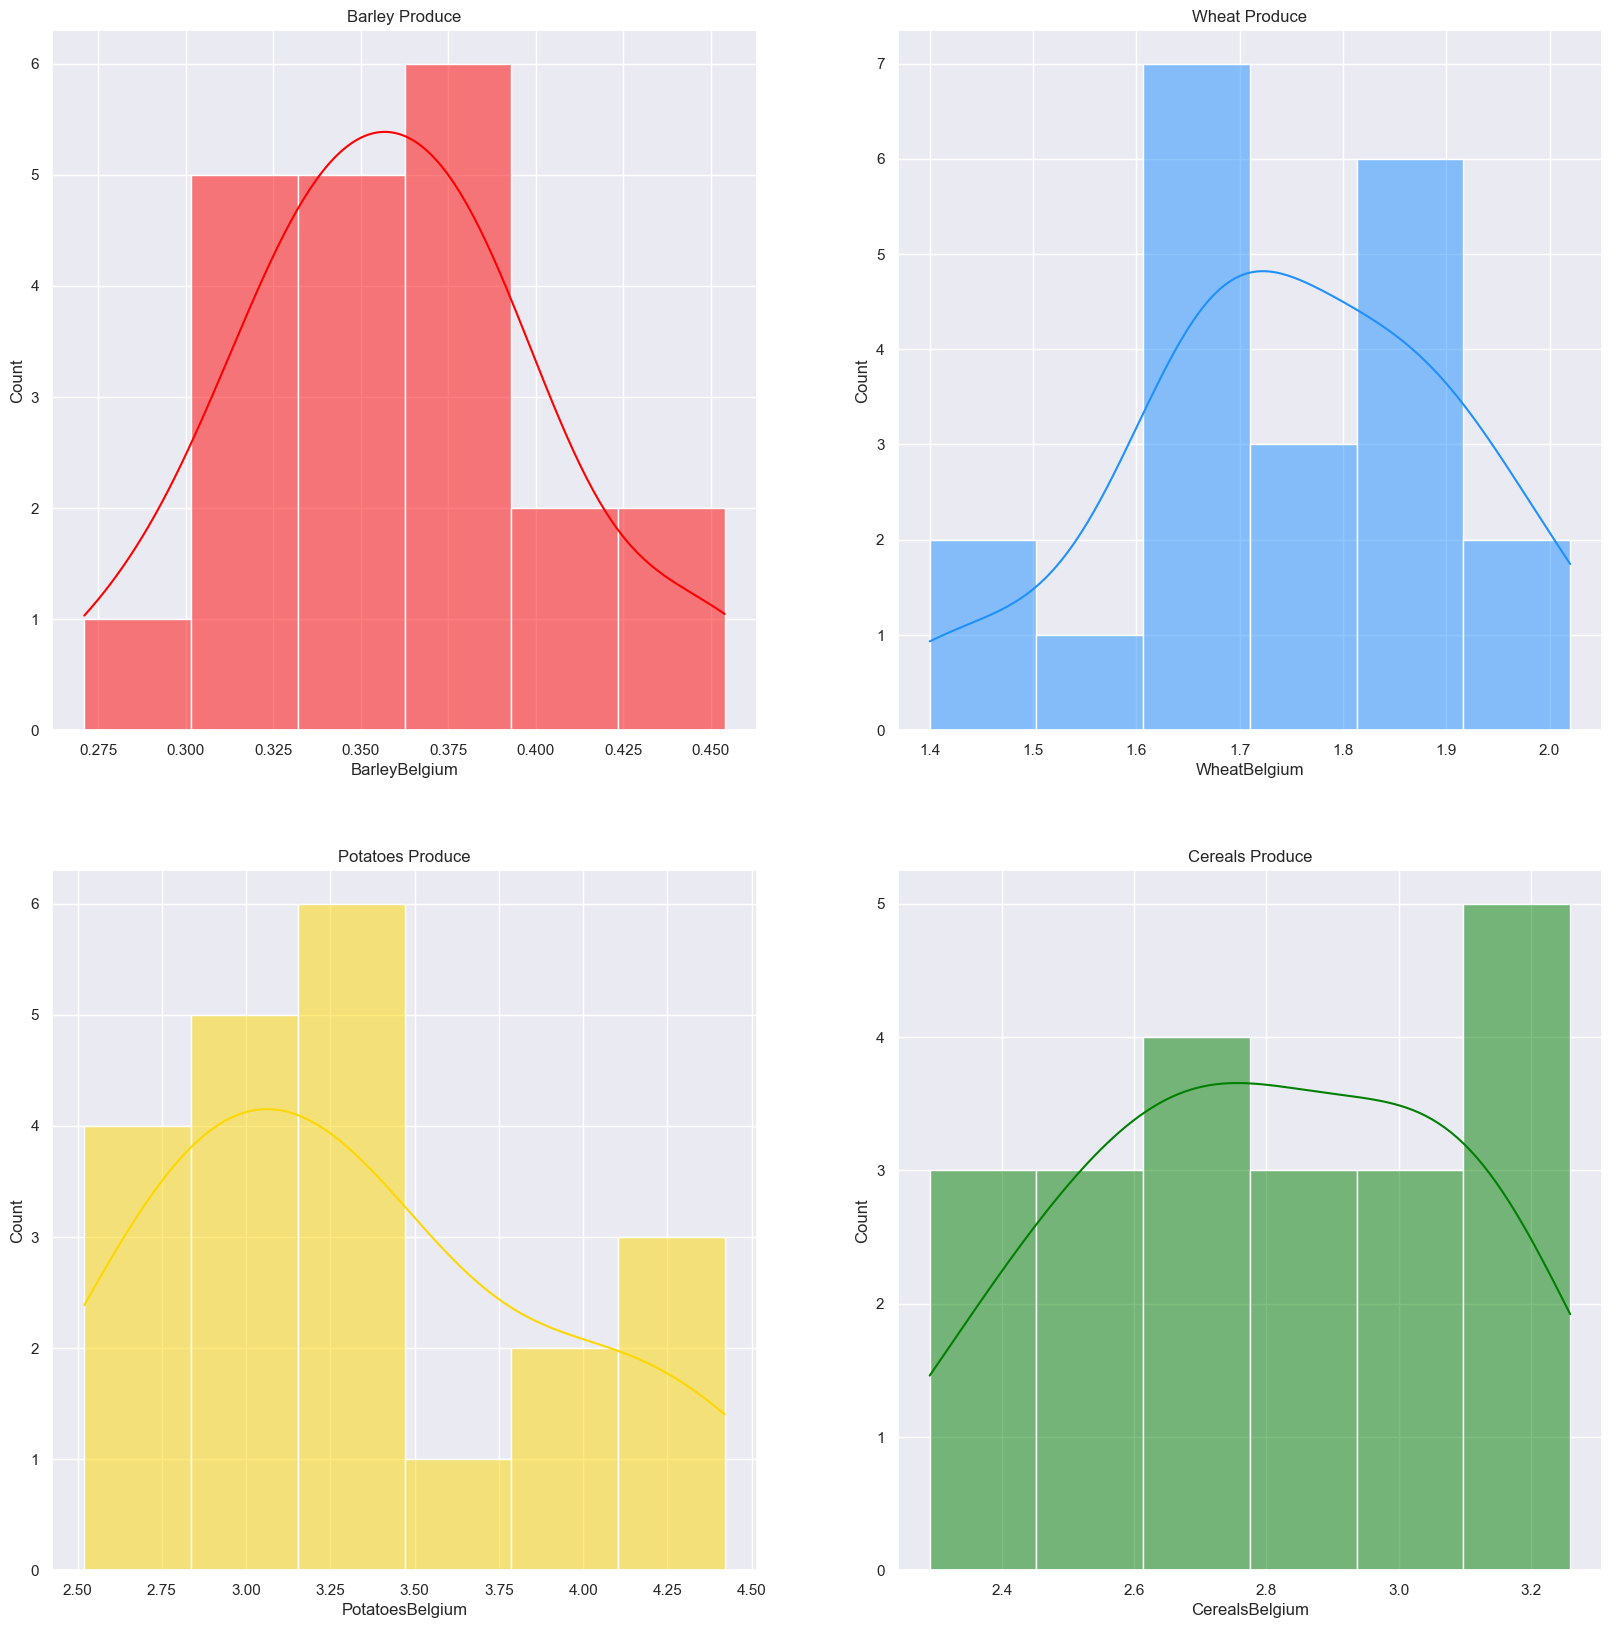

In [27]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(20,20))

sns.histplot(data=belgium_agriculture, x="BarleyBelgium", kde=True,color="red", ax=axs[0, 0]).set(title ="Barley Produce")
sns.histplot(data=belgium_agriculture, x="WheatBelgium", kde=True, color="dodgerblue", ax=axs[0, 1]).set(title ="Wheat Produce")
sns.histplot(data=belgium_agriculture, x="PotatoesBelgium", kde=True, color="gold",  ax=axs[1, 0]).set(title ="Potatoes Produce")
sns.histplot(data=belgium_agriculture, x="CerealsBelgium", kde=True, color="green", ax=axs[1, 1]).set(title ="Cereals Produce")

plt.show()

Text(79.74999999999999, 0.5, 'Columns Name')

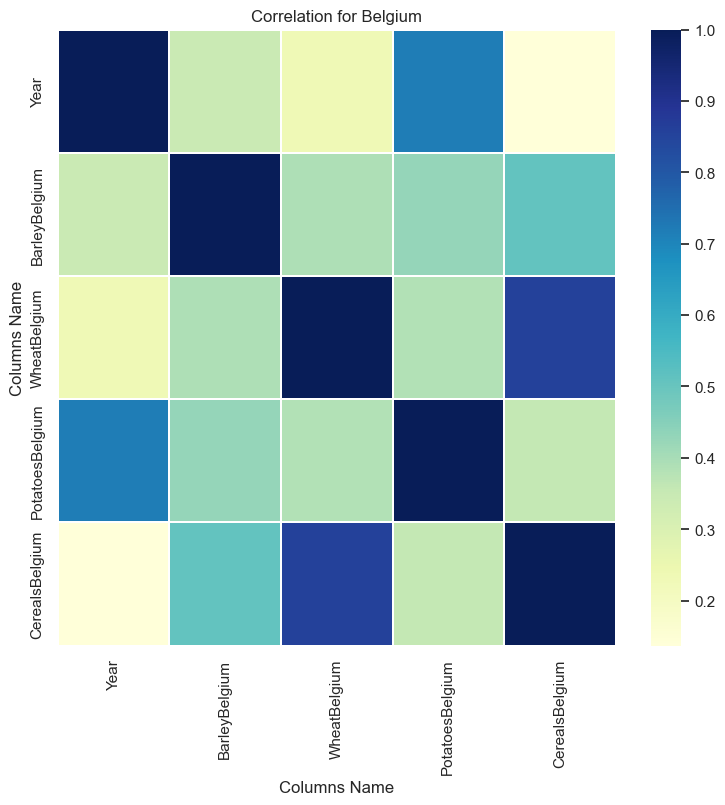

In [28]:
corrmat = belgium_agriculture.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1).set(title='Correlation for Belgium')
plt.xlabel("Columns Name")
plt.ylabel("Columns Name")

#### <font color=#FF0000>Netherlands</font>

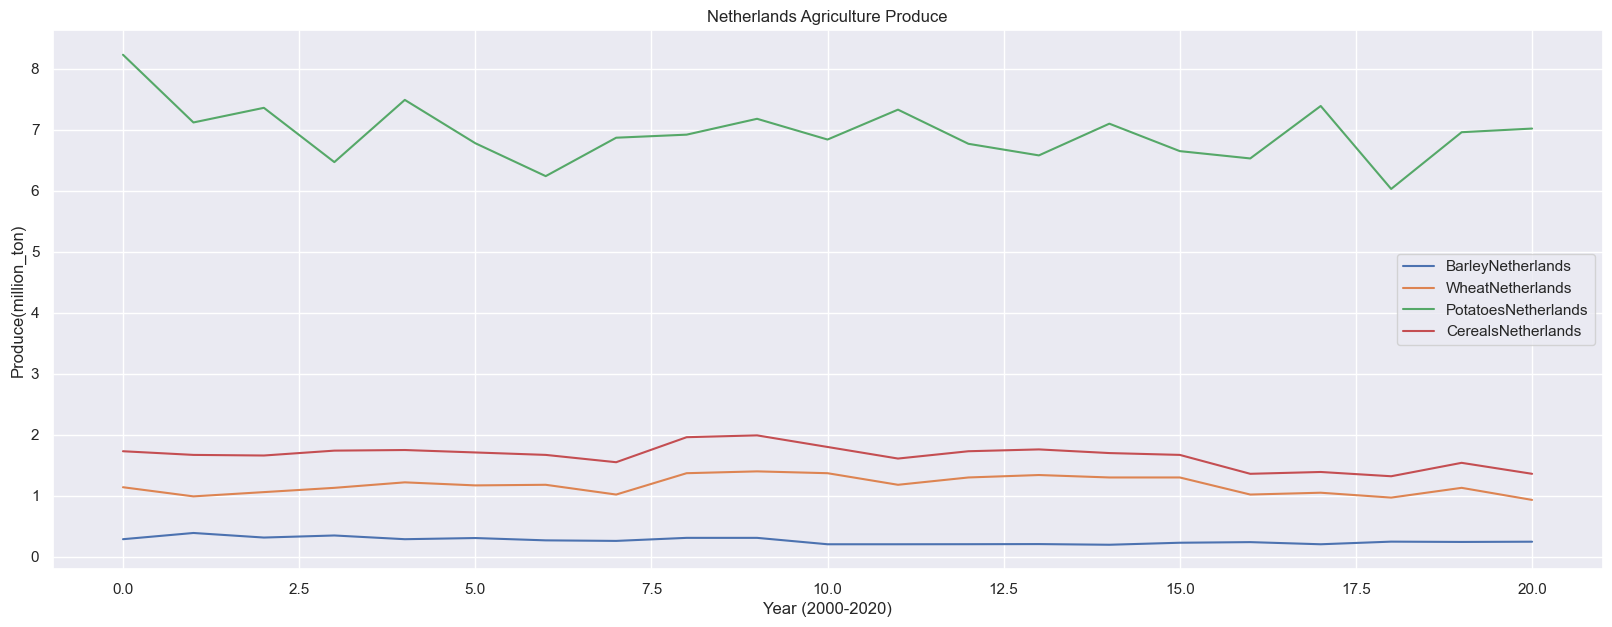

In [29]:
NetherlandsAgriculture = netherlands_agriculture[["BarleyNetherlands", "WheatNetherlands", "PotatoesNetherlands", "CerealsNetherlands"]]
plt.rcParams["figure.figsize"] = (20,7)
NetherlandsAgriculture.plot()
plt.xlabel("Year (2000-2020)")
plt.ylabel("Produce(million_ton)")
plt.title("Netherlands Agriculture Produce")
plt.show()

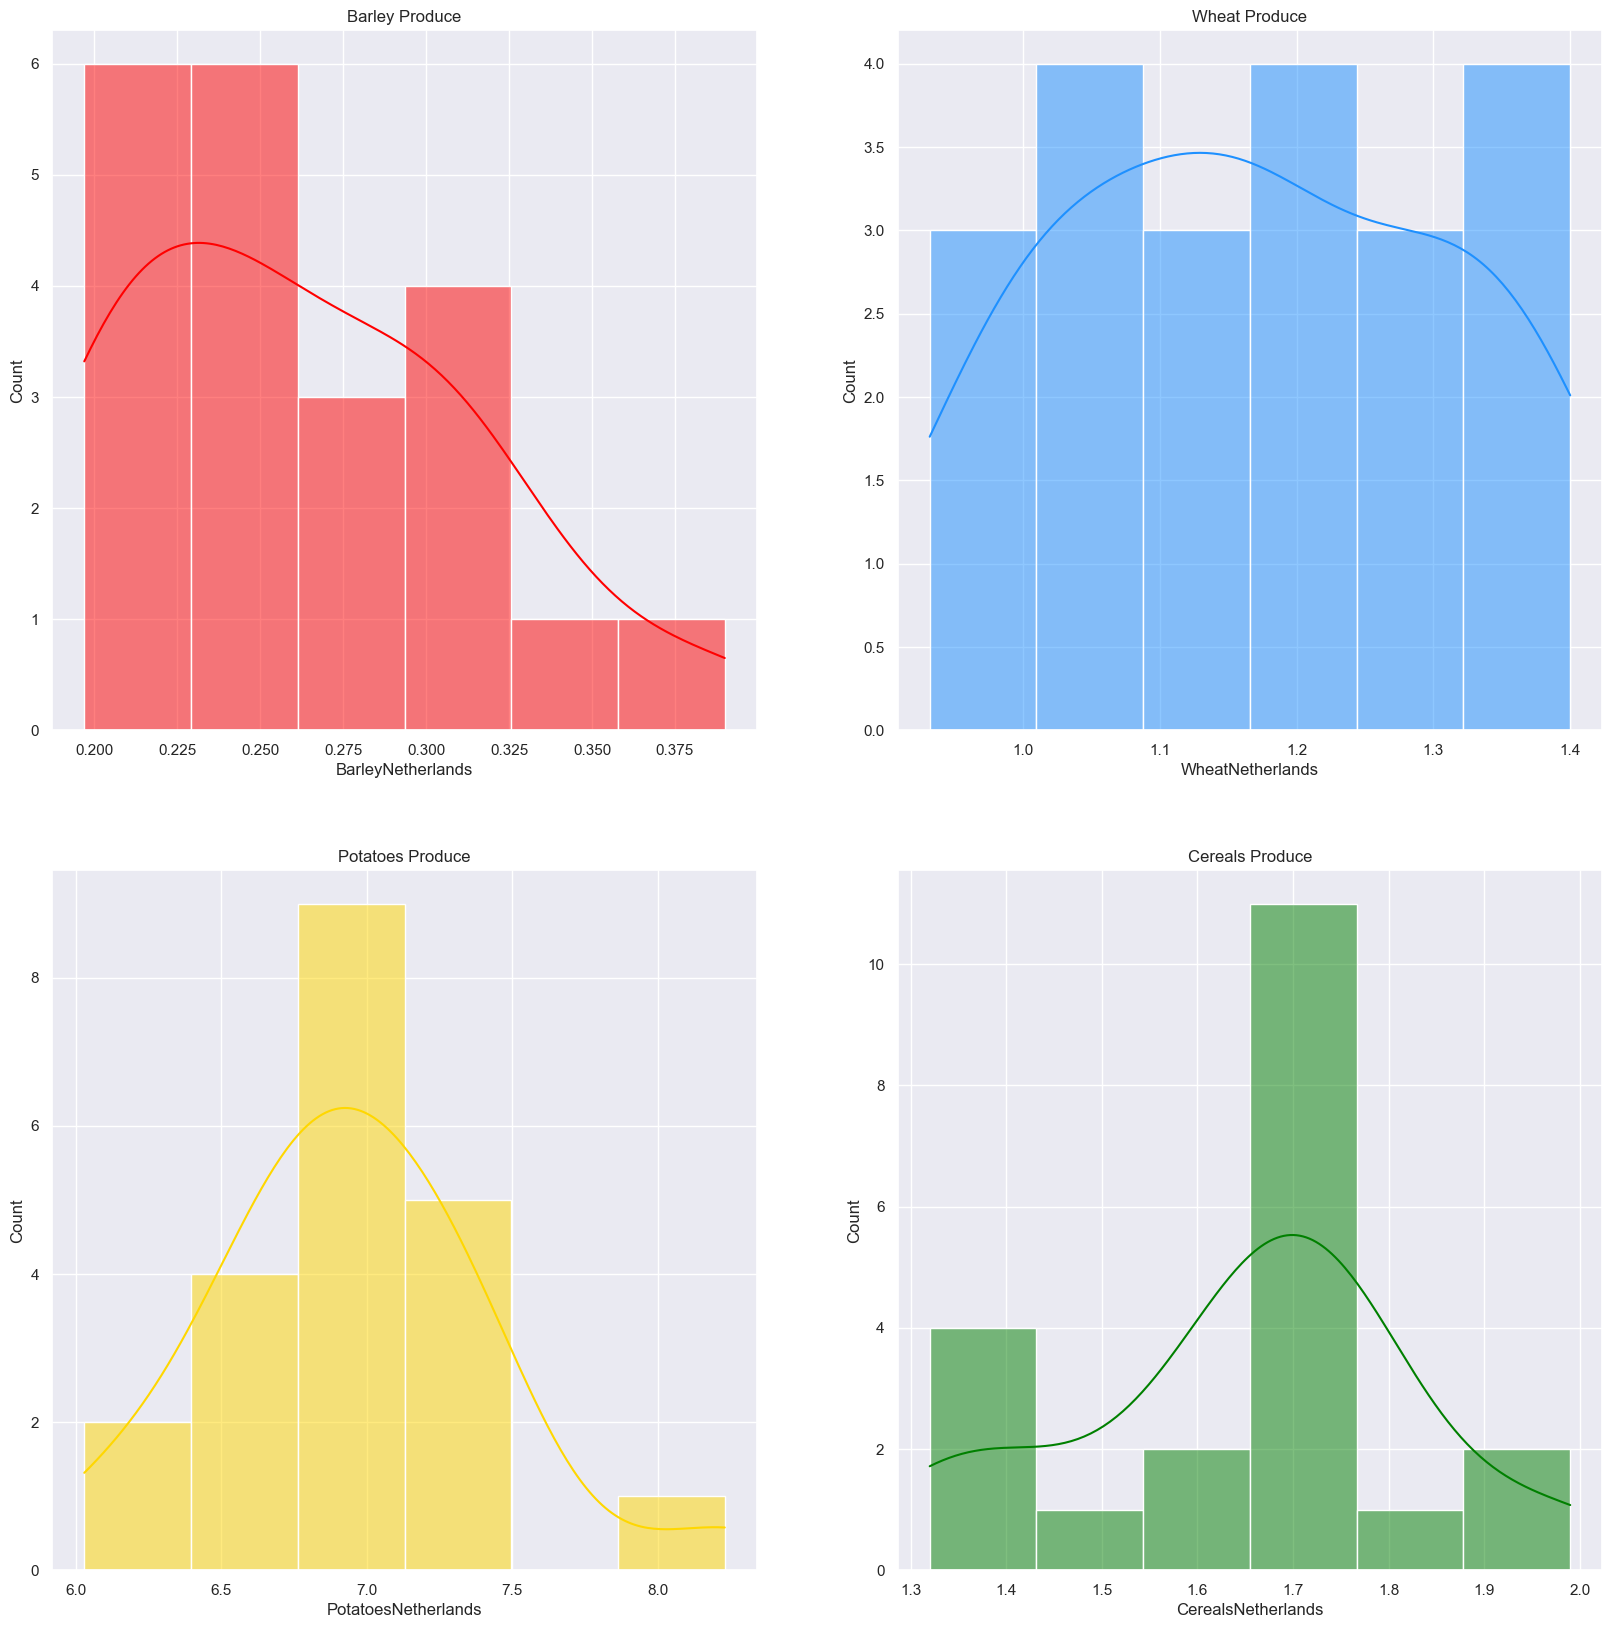

In [30]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(20,20))

sns.histplot(data=netherlands_agriculture, x="BarleyNetherlands", kde=True,color="red", ax=axs[0, 0]).set(title ="Barley Produce")
sns.histplot(data=netherlands_agriculture, x="WheatNetherlands", kde=True, color="dodgerblue", ax=axs[0, 1]).set(title ="Wheat Produce")
sns.histplot(data=netherlands_agriculture, x="PotatoesNetherlands", kde=True, color="gold",  ax=axs[1, 0]).set(title ="Potatoes Produce")
sns.histplot(data=netherlands_agriculture, x="CerealsNetherlands", kde=True, color="green", ax=axs[1, 1]).set(title ="Cereals Produce")

plt.show()

Text(79.74999999999999, 0.5, 'Columns Name')

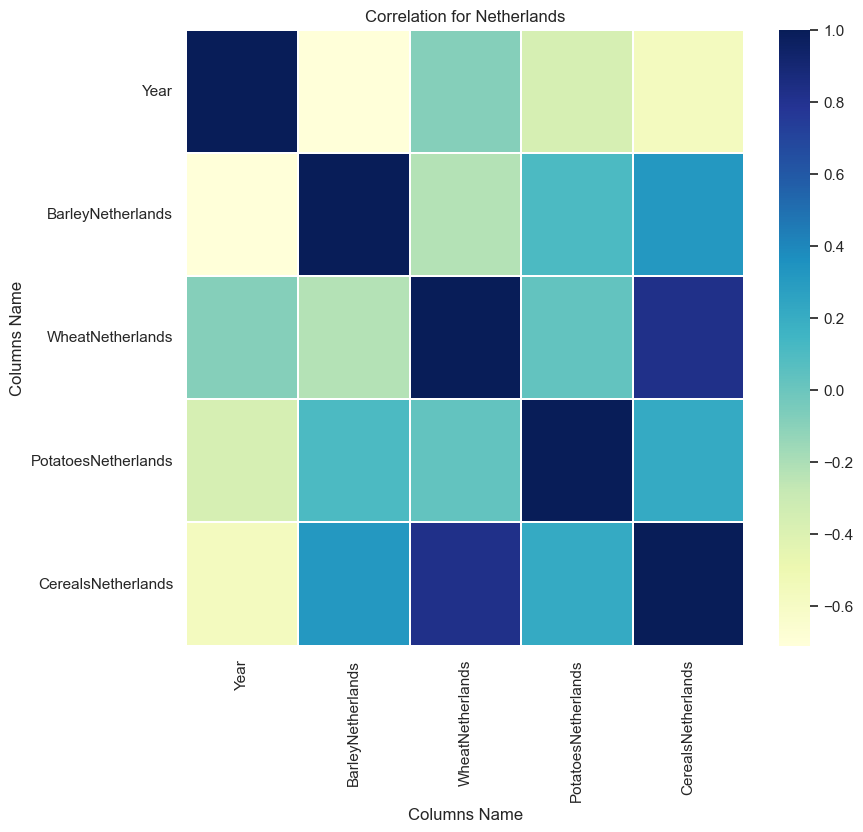

In [31]:
corrmat = netherlands_agriculture.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1).set(title='Correlation for Netherlands')
plt.xlabel("Columns Name")
plt.ylabel("Columns Name")

#### <font color=#FF0000>Number of People Working in Agriculture </font>

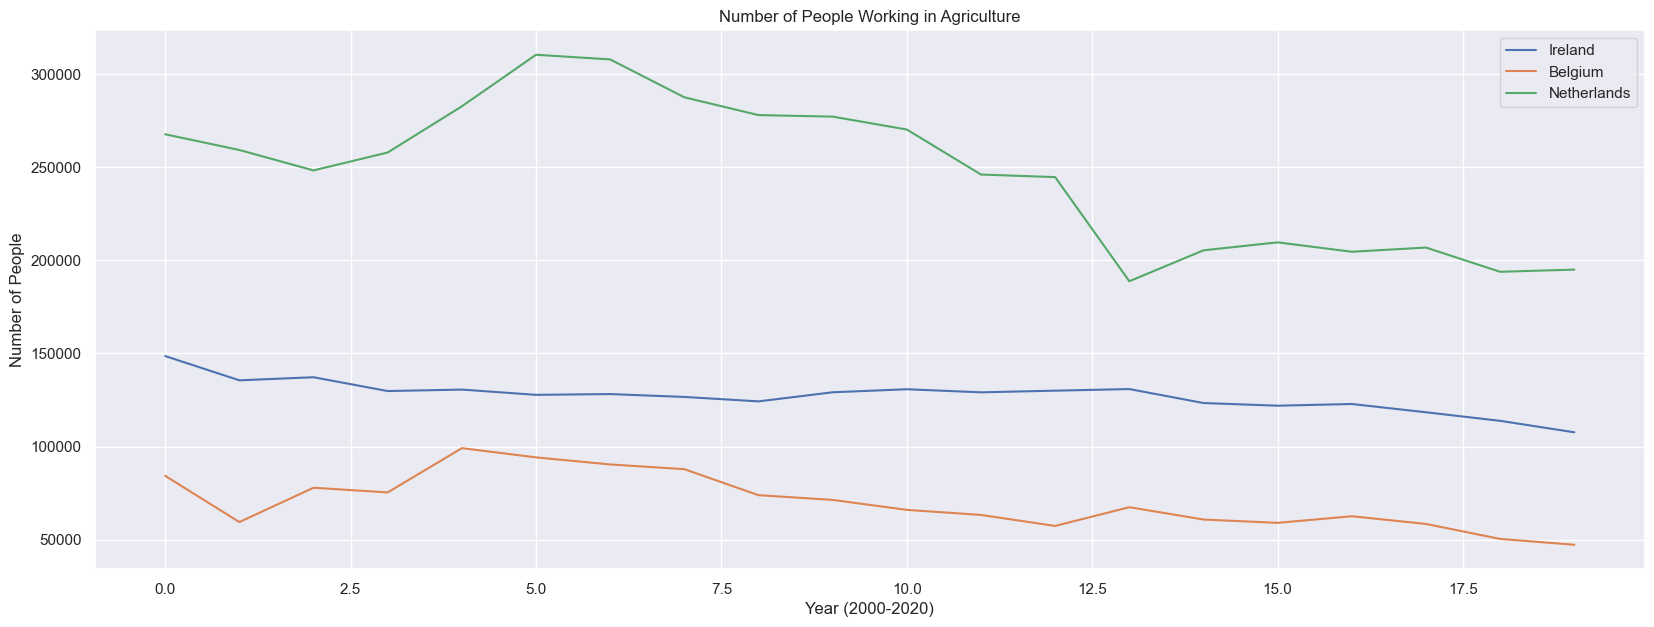

In [32]:
NumberofPeaople = number_of_people[["Ireland", "Belgium", "Netherlands"]]
plt.rcParams["figure.figsize"] = (20,7)
NumberofPeaople.plot()
plt.xlabel("Year (2000-2020)")
plt.ylabel("Number of People")
plt.title("Number of People Working in Agriculture")
plt.show()

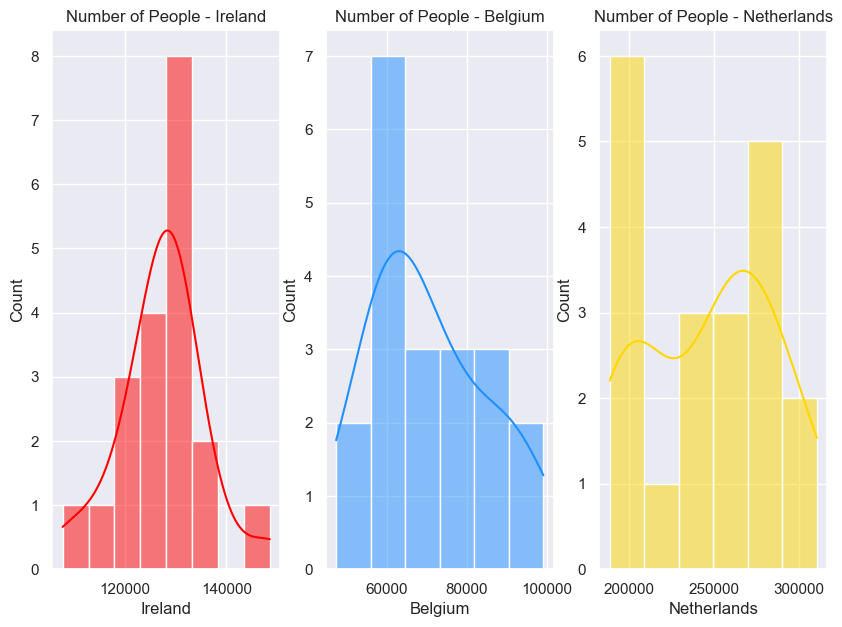

In [33]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10,7))

sns.histplot(data=number_of_people, x="Ireland", kde=True,color="red", ax=axs[0]).set(title ="Number of People - Ireland")
sns.histplot(data=number_of_people, x="Belgium", kde=True, color="dodgerblue", ax=axs[1]).set(title ="Number of People - Belgium")
sns.histplot(data=number_of_people, x="Netherlands", kde=True, color="gold",  ax=axs[2]).set(title ="Number of People - Netherlands")


plt.show()

## 1.6. Statistics

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

Text(0.5, 0, 'Countries Ireland - 0, Belgium - 1')

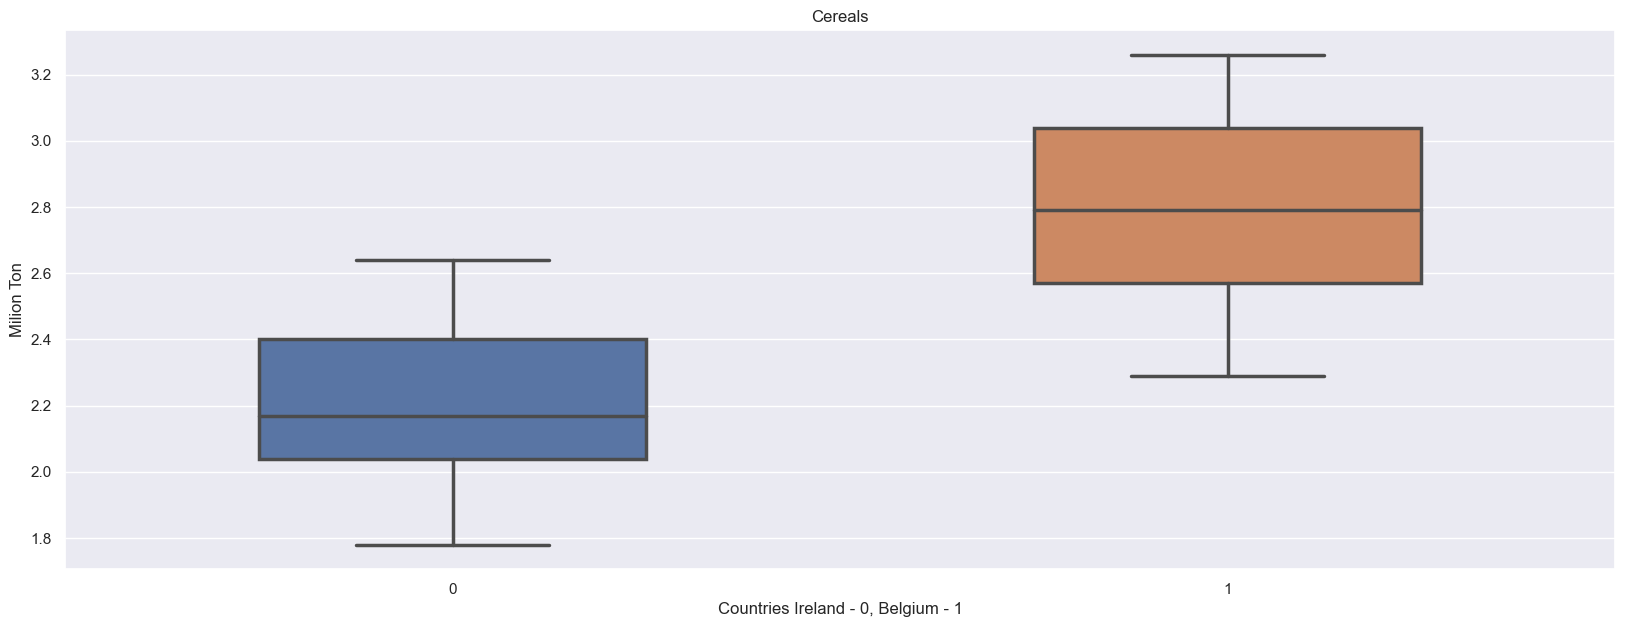

In [34]:
# Box Plot (Ireland-Belgium (Cereals)) 
sns.boxplot(data = [ireland_agriculture["CerealsIreland"], belgium_agriculture["CerealsBelgium"]], linewidth = 2.5, width = 0.50)
plt.title('Cereals')
plt.ylabel('Milion Ton')
plt.xlabel('Countries Ireland - 0, Belgium - 1')

In [35]:
# Variance Value for Ireland Agriculure
varianceIreland = statistics.variance(ireland_agriculture["CerealsIreland"])
print("Variance:" , varianceIreland)

Variance: 0.059446190476190486


In [36]:
# Variance Value for Belgium Agriculure
varianceBelgium = statistics.variance(belgium_agriculture["CerealsBelgium"])
print("Variance:" , varianceBelgium)

Variance: 0.08049904761904762


#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font> 

Text(0.5, 0, 'Countries Ireland - 0, Netherlands - 1')

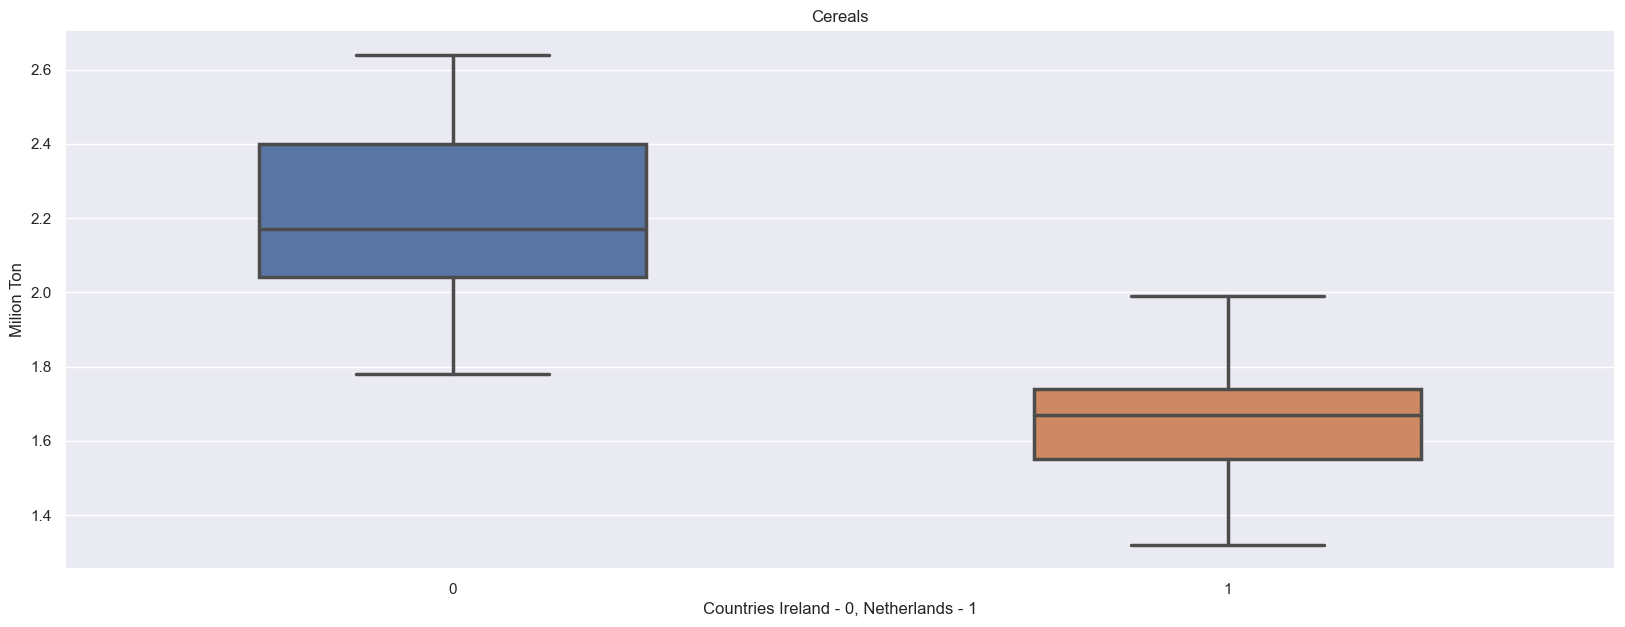

In [37]:
sns.boxplot(data = [ireland_agriculture["CerealsIreland"], netherlands_agriculture["CerealsNetherlands"]], linewidth = 2.5, width = 0.50)
plt.title('Cereals')
plt.ylabel('Milion Ton')
plt.xlabel('Countries Ireland - 0, Netherlands - 1')

In [38]:
# Variance Value for Ireland Agriculure
varianceIreland = statistics.variance(ireland_agriculture["CerealsIreland"])
print("Variance:" , varianceIreland)

Variance: 0.059446190476190486


In [39]:
# Variance Value for Netherlands Agriculure
varianceNetherlands = statistics.variance(netherlands_agriculture["CerealsNetherlands"])
print("Variance:" , varianceNetherlands)

Variance: 0.03264904761904761


### Skewness - Ireland (Cereals)

In [40]:
print ("Ireland(Cereals) Skewness =" ,skew(ireland_agriculture["CerealsIreland"], axis=0, bias=True))

Ireland(Cereals) Skewness = 0.14773420187478034


### Skewness - Belgium (Cereals)

In [41]:
print ("Belgium(Cereals) Skewness =" ,skew(belgium_agriculture["CerealsBelgium"], axis=0, bias=True))

Belgium(Cereals) Skewness = -0.11298832217836846


### Skewness - Netherlands (Cereals)

In [42]:
print ("Netherlands(Cereals) Skewness =" ,skew(netherlands_agriculture["CerealsNetherlands"], axis=0, bias=True))

Netherlands(Cereals) Skewness = -0.25734463790835777


### Kurtosis - Ireland (Cereals)

In [43]:
print ("Ireland(Cereals) Kurtosis =" ,kurtosis(ireland_agriculture["CerealsIreland"], axis=0, bias=True))

Ireland(Cereals) Kurtosis = -1.0022928425545965


### Kurtosis - Belgium (Cereals)

In [44]:
print ("Belgium(Cereals) Kurtosis =" ,kurtosis(belgium_agriculture["CerealsBelgium"], axis=0, bias=True))

Belgium(Cereals) Kurtosis = -1.0708631308181429


### Kurtosis - Netherlands (Cereals)

In [45]:
print ("Netherlands(Cereals) Kurtosis =" ,kurtosis(netherlands_agriculture["CerealsNetherlands"], axis=0, bias=True))

Netherlands(Cereals) Kurtosis = -0.31819675579472806


### Standart Error

In [46]:
from scipy.stats import sem
sem_1 = sem(ireland_agriculture['CerealsIreland'])
sem_2 = sem(belgium_agriculture['CerealsBelgium'])
sem_3 = sem(netherlands_agriculture['CerealsNetherlands'])
print("SEM for Ireland Dataset..:",sem_1)
print("SEM for Germany Dataset..:",sem_2)
print("SEM for Netherland Dataset..:",sem_3)

SEM for Ireland Dataset..: 0.05320499013303818
SEM for Germany Dataset..: 0.06191355248941391
SEM for Netherland Dataset..: 0.03942989415770706


### 1- Two-sample t-tests

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

In [47]:
stats.ttest_ind(a=ireland_agriculture["CerealsIreland"], b=belgium_agriculture["CerealsBelgium"])

Ttest_indResult(statistic=-7.151576030947555, pvalue=1.1546281023048881e-08)

#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font>  

In [48]:
stats.ttest_ind(a=ireland_agriculture["CerealsIreland"], b=netherlands_agriculture["CerealsNetherlands"])

Ttest_indResult(statistic=8.520991174121235, pvalue=1.5769911261442334e-10)

### 2- Kolmogorov Smirnov Two Sample Test 

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

In [49]:
KStest = ks_2samp(ireland_agriculture["CerealsIreland"],belgium_agriculture["CerealsBelgium"])
print(KStest)

KstestResult(statistic=0.7142857142857143, pvalue=1.94917204154521e-05)


#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font>  

In [50]:
KStest = ks_2samp(ireland_agriculture["CerealsIreland"],netherlands_agriculture["CerealsNetherlands"])
print(KStest)

KstestResult(statistic=0.8571428571428571, pvalue=4.265613396531809e-08)


### 3- Mann-Whitney U test

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

In [51]:
stats.mannwhitneyu(ireland_agriculture["CerealsIreland"],belgium_agriculture["CerealsBelgium"])


MannwhitneyuResult(statistic=27.5, pvalue=1.2747053548901029e-06)

#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font>  

In [52]:
stats.mannwhitneyu(ireland_agriculture["CerealsIreland"],netherlands_agriculture["CerealsNetherlands"])

MannwhitneyuResult(statistic=433.0, pvalue=9.579232621828447e-08)

### 4 - Two Sample Z-Test

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

In [53]:
z_test, p_value = ztest(ireland_agriculture["CerealsIreland"],belgium_agriculture["CerealsBelgium"])
print("z-test:", z_test , "-", "p value:", p_value)

z-test: -7.151576030947555 - p value: 8.578718233357267e-13


#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font>  

In [54]:
z_test, p_value = ztest(ireland_agriculture["CerealsIreland"],netherlands_agriculture["CerealsNetherlands"])
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 8.520991174121235 - p value: 1.5819359244005754e-17


### 5 - Wilcoxon Sign-Ranked Test

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

In [55]:
stats.wilcoxon(ireland_agriculture["CerealsIreland"],belgium_agriculture["CerealsBelgium"])

WilcoxonResult(statistic=1.0, pvalue=1.9073486328125e-06)

#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font>  

In [56]:
stats.wilcoxon(ireland_agriculture["CerealsIreland"],netherlands_agriculture["CerealsNetherlands"])

WilcoxonResult(statistic=0.0, pvalue=9.5367431640625e-07)

### 6 - ANOVA Test

#### <font color=#FF0000>Ireland - Belgium (Cereals)</font>  

In [57]:
stat, p = f_oneway(ireland_agriculture["CerealsIreland"],belgium_agriculture["CerealsBelgium"])
print("Statistics=%.3f, p=%.3f" % (stat, p))

alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")


Statistics=51.145, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


#### <font color=#FF0000>Ireland - Netherlands (Cereals)</font>  

In [58]:
stat, p = f_oneway(ireland_agriculture["CerealsIreland"],netherlands_agriculture["CerealsNetherlands"])
print("Statistics=%.3f, p=%.3f" % (stat, p))

alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")


Statistics=72.607, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


## <font color=blue>2 - DATA PREPARATION </font>

### 2.1. Missing Values

#### <font color=#FF0000>Ireland</font>  

In [59]:
ireland_agriculture.isnull().sum()

Year               0
BarleyIreland      0
WheatIreland       0
PotatoesIreland    0
CerealsIreland     0
dtype: int64

<AxesSubplot:>

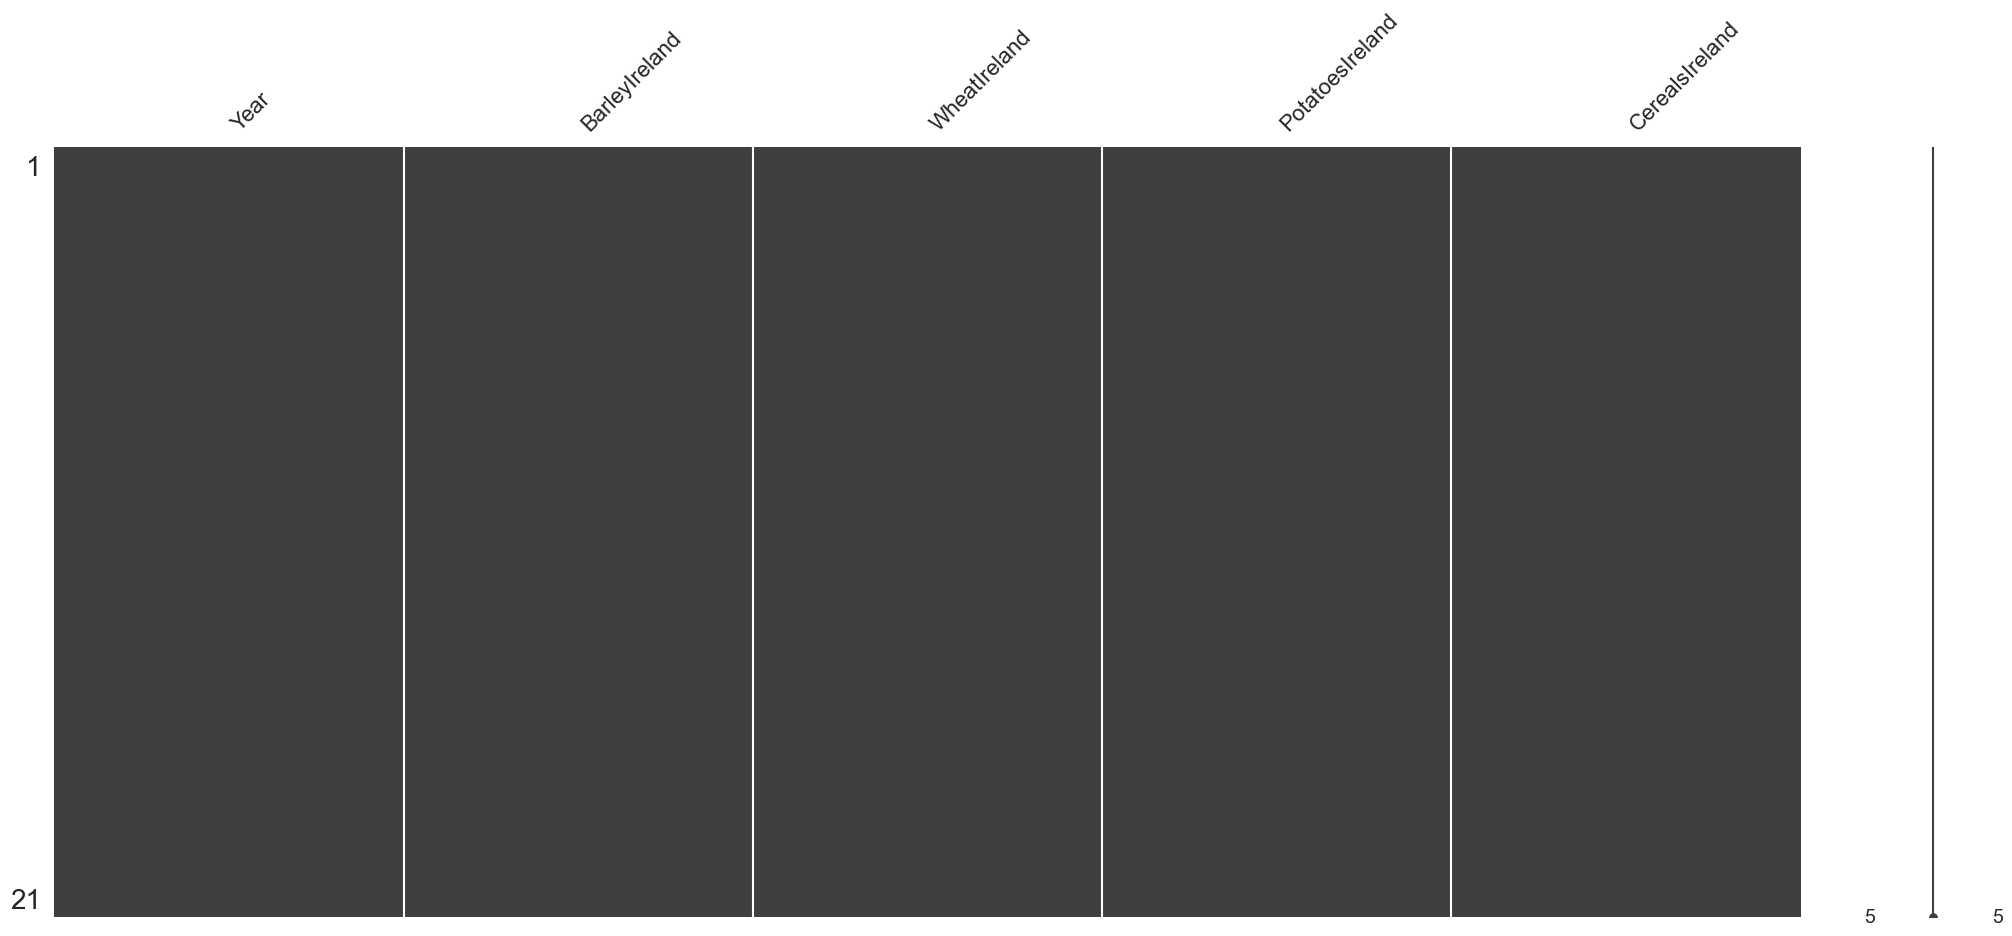

In [60]:
msno.matrix(ireland_agriculture)

#### <font color=#FF0000>Belgium</font>  

In [61]:
belgium_agriculture.isnull().sum()

Year               0
BarleyBelgium      0
WheatBelgium       0
PotatoesBelgium    0
CerealsBelgium     0
dtype: int64

<AxesSubplot:>

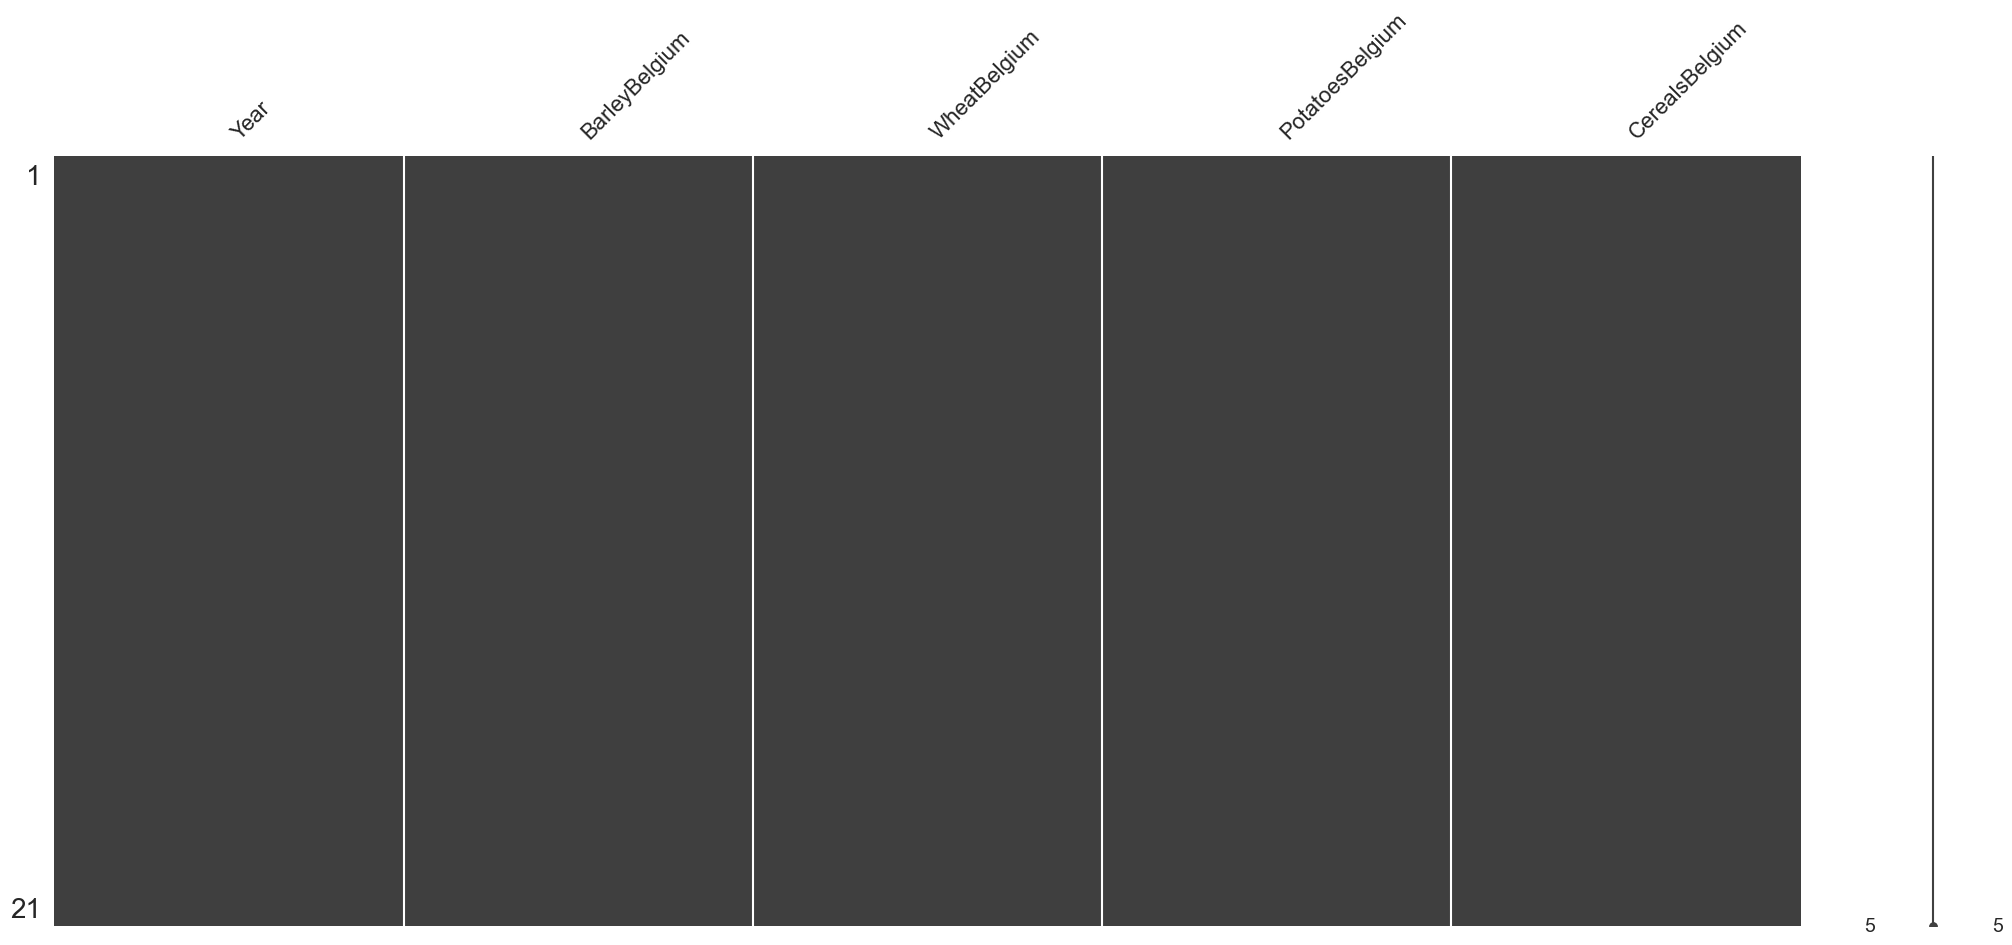

In [62]:
msno.matrix(belgium_agriculture)

#### <font color=#FF0000>Netherlands</font>  

In [63]:
netherlands_agriculture.isnull().sum()

Year                   0
BarleyNetherlands      0
WheatNetherlands       0
PotatoesNetherlands    0
CerealsNetherlands     0
dtype: int64

<AxesSubplot:>

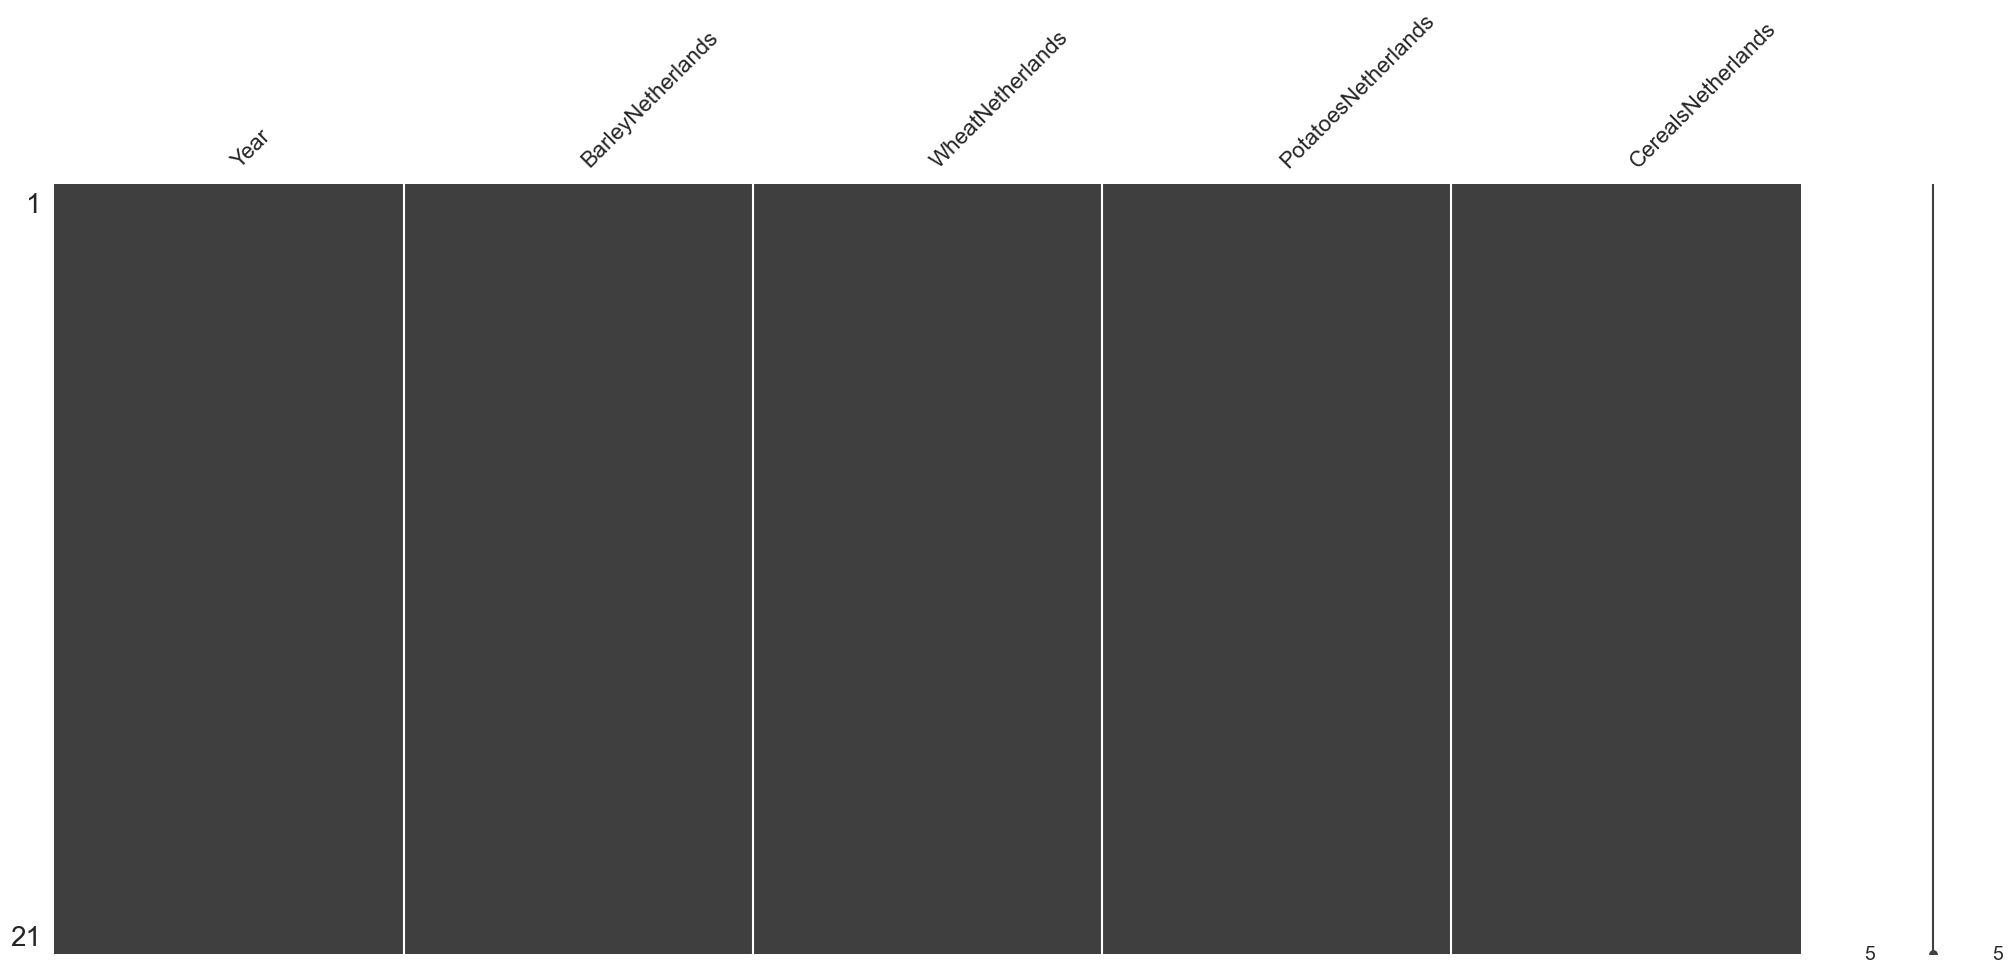

In [64]:
msno.matrix(netherlands_agriculture)

#### <font color=#FF0000>Number of People for Agriculture</font>  

In [65]:
number_of_people.isnull().sum()

Year           0
Ireland        1
Belgium        1
Netherlands    1
dtype: int64

<AxesSubplot:>

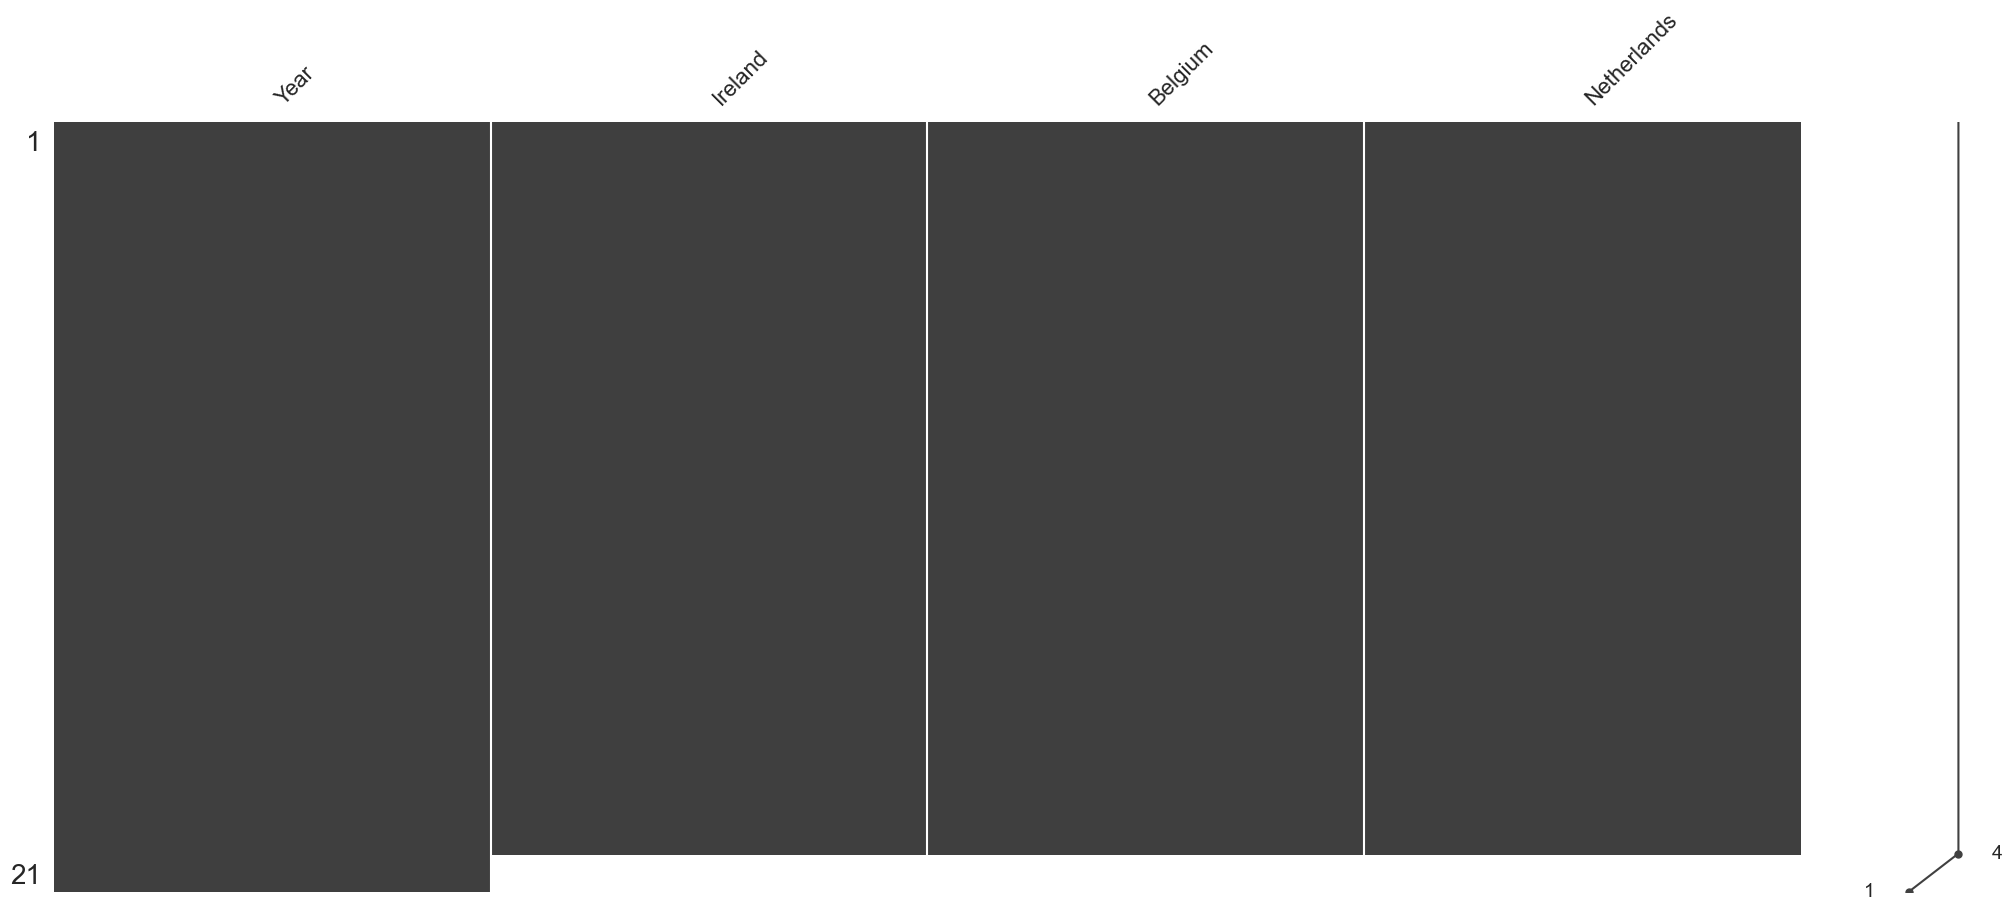

In [66]:
msno.matrix(number_of_people)

###  2.2. Handling Missing Values

#### <font color=#FF0000>Number of People for Agriculture - Ireland </font>  

In [67]:
number_of_people.iloc[:,1:2] = number_of_people["Ireland"].fillna(method="pad")
number_of_people.iloc[:,1:2] 

,Ireland
0,148559.0
1,135541.0
2,137193.0
3,129773.0
4,130569.0
5,127740.0
6,128155.0
7,126620.0
8,124238.0
9,129118.0


#### <font color=#FF0000>Number of People for Agriculture - Belgium </font>  

In [68]:
number_of_people.iloc[:,2:3] =number_of_people["Belgium"].fillna(method="pad")
number_of_people.iloc[:,2:3]

,Belgium
0,84253.51744
1,59443.32038
2,77870.83375
3,75360.37367
4,99123.55629
5,94165.74545
6,90374.27322
7,87838.64946
8,73876.81071
9,71341.36438


#### <font color=#FF0000>Number of People for Agriculture - Netherlands </font> 

In [69]:
number_of_people.iloc[:,3:4]  = number_of_people["Netherlands"].fillna(method="pad")
number_of_people.iloc[:,3:4]

,Netherlands
0,267628.4816
1,259198.9201
2,248236.2882
3,257848.7536
4,282651.1230
5,310327.9580
6,307814.7645
7,287479.2702
8,277932.7682
9,277108.7070


###  2.2. Outlier Data

#### <font color=#FF0000>Ireland</font> 

<AxesSubplot:xlabel='CerealsIreland'>

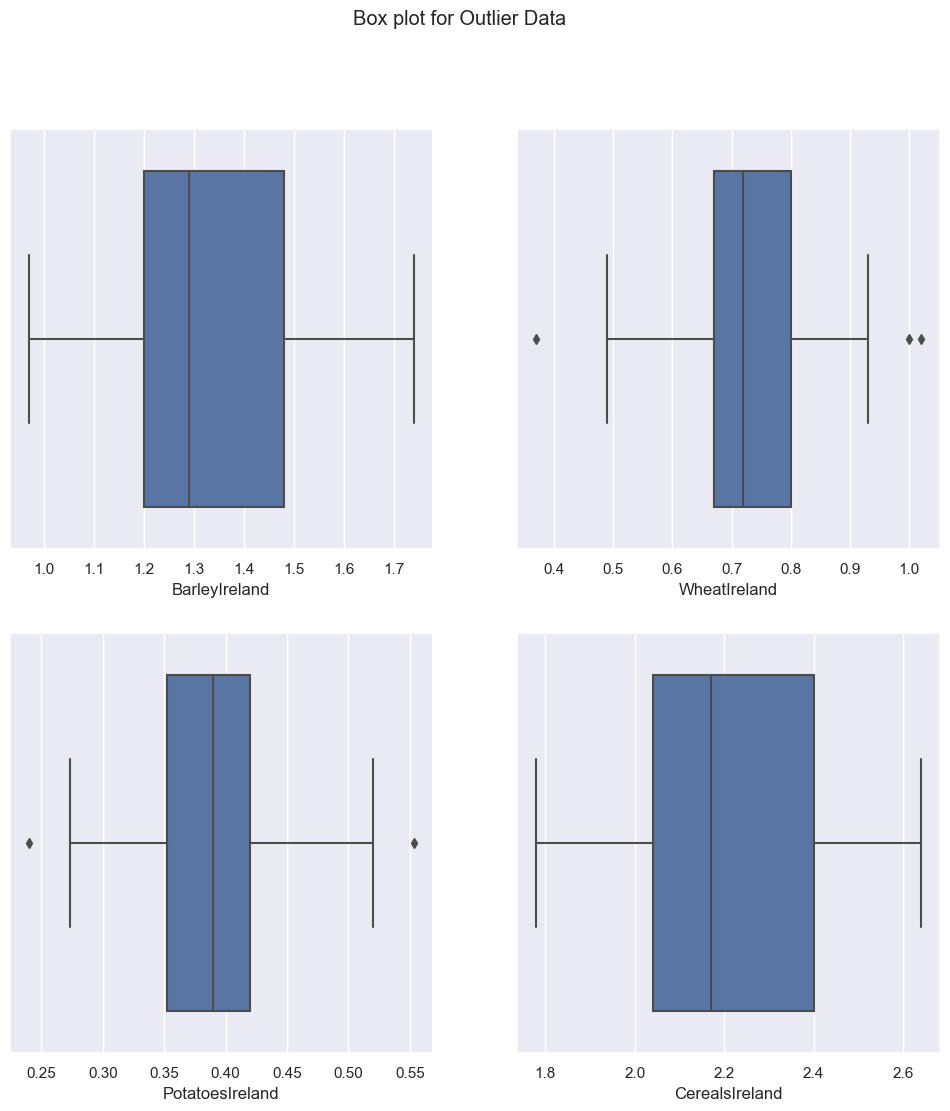

In [70]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Box plot for Outlier Data')
sns.boxplot(ax=axes[0, 0],x=ireland_agriculture['BarleyIreland'])
sns.boxplot(ax=axes[0, 1],x=ireland_agriculture['WheatIreland'])
sns.boxplot(ax=axes[1, 0],x=ireland_agriculture['PotatoesIreland'])
sns.boxplot(ax=axes[1, 1],x=ireland_agriculture['CerealsIreland'])

#### Position of the Outlier - WheatIreland

In [71]:
print(np.where(ireland_agriculture['WheatIreland']>0.95))
print(np.where(ireland_agriculture['WheatIreland']<0.4))

(array([4, 8], dtype=int64),)
(array([20], dtype=int64),)


#### Position of the Outlier - PotatoesIreland

In [72]:
print(np.where(ireland_agriculture['PotatoesIreland']>0.54))
print(np.where(ireland_agriculture['PotatoesIreland']<0.25))

(array([4], dtype=int64),)
(array([12], dtype=int64),)


#### <font color=#FF0000>Belgium</font> 

<AxesSubplot:xlabel='CerealsBelgium'>

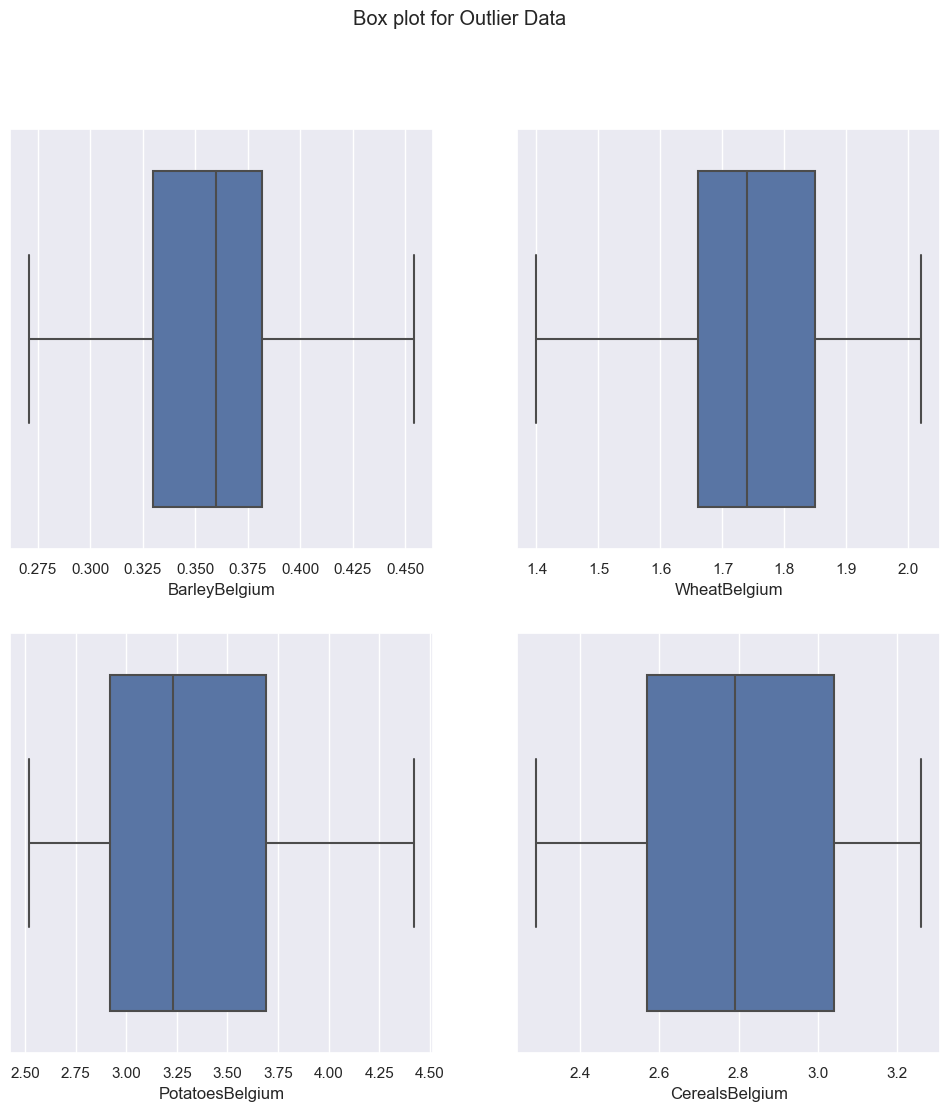

In [73]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Box plot for Outlier Data')
sns.boxplot(ax=axes[0, 0],x=belgium_agriculture['BarleyBelgium'])
sns.boxplot(ax=axes[0, 1],x=belgium_agriculture['WheatBelgium'])
sns.boxplot(ax=axes[1, 0],x=belgium_agriculture['PotatoesBelgium'])
sns.boxplot(ax=axes[1, 1],x=belgium_agriculture['CerealsBelgium'])

#### <font color=#FF0000>Netherlands</font> 

<AxesSubplot:xlabel='CerealsNetherlands'>

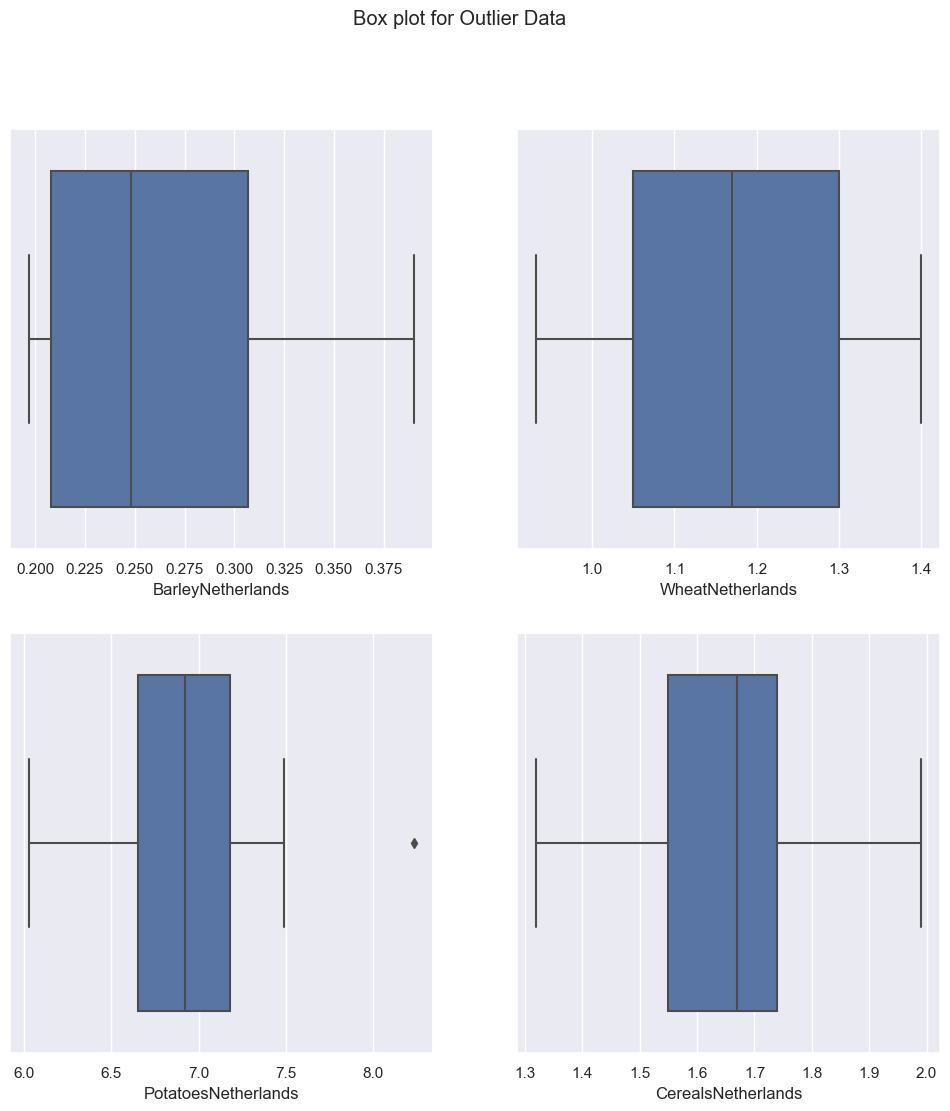

In [74]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Box plot for Outlier Data')
sns.boxplot(ax=axes[0, 0],x=netherlands_agriculture['BarleyNetherlands'])
sns.boxplot(ax=axes[0, 1],x=netherlands_agriculture['WheatNetherlands'])
sns.boxplot(ax=axes[1, 0],x=netherlands_agriculture['PotatoesNetherlands'])
sns.boxplot(ax=axes[1, 1],x=netherlands_agriculture['CerealsNetherlands'])

#### Position of the Outlier - PotatoesNetherlands

In [75]:
print(np.where(netherlands_agriculture['PotatoesNetherlands']>8.0))

(array([0], dtype=int64),)


#### <font color=#FF0000>Number of People for Agriculture</font> 

<AxesSubplot:xlabel='Netherlands'>

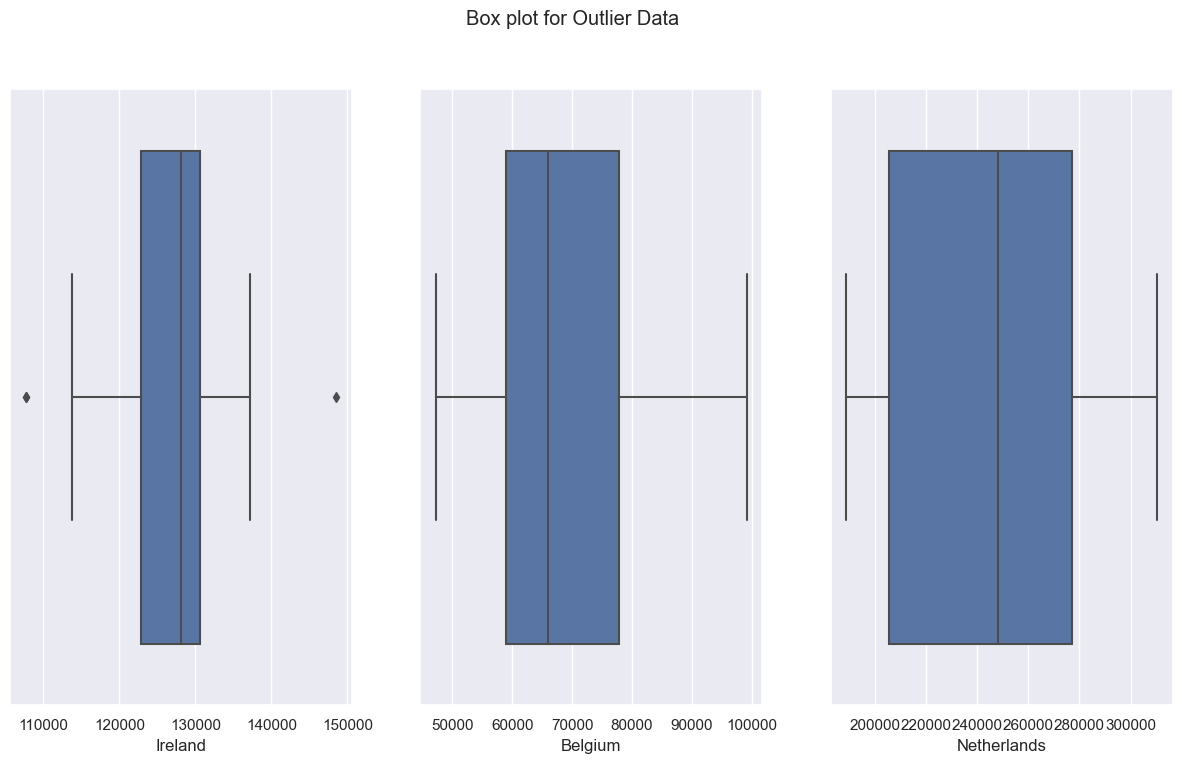

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Box plot for Outlier Data')
sns.boxplot(ax=axes[0],x=number_of_people['Ireland'])
sns.boxplot(ax=axes[1],x=number_of_people['Belgium'])
sns.boxplot(ax=axes[2],x=number_of_people['Netherlands'])


#### Position of the Outlier - Number of People for Agriculture Ireland

In [77]:
print(np.where(number_of_people['Ireland']>140000))
print(np.where(number_of_people['Ireland']<110000))

(array([0], dtype=int64),)
(array([19, 20], dtype=int64),)


## <font color=blue>3 - MODELING </font>

### Modelling Data

In [78]:
X, y =pd.concat([ireland_agriculture.iloc[:,1:4], number_of_people.iloc[:,1:2]], axis=1) , ireland_agriculture.iloc[:,4:5]
X = X.drop("PotatoesIreland", axis=1)

In [79]:
# StandarScale for "ireland_agriculture" Data Set
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.09211212,  0.07402232,  2.42051998],
       [-0.23718871,  0.27162429,  1.00059669],
       [-1.73631348,  0.9302975 ,  1.18078668],
       [-0.62405962,  0.46922625,  0.37145876],
       [ 0.00460561,  1.91830733,  0.45828154],
       [-1.49451916,  0.48898645,  0.14971164],
       [-0.9142128 ,  0.47581299,  0.19497729],
       [-1.01093053, -0.05771232,  0.02754894],
       [-0.18882985,  1.78657269, -0.23226496],
       [-0.47898303, -0.18944696,  0.3000154 ],
       [-0.52734189, -0.38704893,  0.47813298],
       [ 0.39147651,  1.32550143,  0.29739762],
       [-0.33390644, -0.12357964,  0.39469149],
       [ 1.6004481 , -1.17745679,  0.48827685],
       [ 1.93896014, -0.05771232, -0.32934068],
       [ 1.98731901, -0.18944696, -0.48542535],
       [ 0.72998856, -0.51878357, -0.38671352],
       [ 0.87506515, -0.25531428, -0.87089231],
       [-0.72077735, -1.57266072, -1.37197754],
       [ 0.72998856, -0.84812018, -2.04289075],
       [ 0.10132333, -2.36306858, -2.042

In [80]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 1- Decision Tree Regression

In [81]:
decisionTree = DecisionTreeRegressor(max_depth =2 ,random_state=0)
decisionTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [82]:
# Prediction
y_pred = decisionTree.predict(X_test)

# Calculate the mean squared error and r2 score
dmse = mean_squared_error(y_test, y_pred)
dr2 = r2_score(y_test, y_pred)
dtrain_acc = decisionTree.score(X_train, y_train)
dtest_acc = decisionTree.score(X_test, y_test)

print("Mean squared error:", dmse)
print("r2 score:", dr2)
print("Train accuracy:", dtrain_acc)
print("Test accuracy:", dtest_acc)

Mean squared error: 0.05180860615079369
r2 score: 0.14096450277852923
Train accuracy: 0.9049672033392963
Test accuracy: 0.14096450277852923


[Text(0.5, 0.8333333333333334, 'X[0] <= -0.044\nsquared_error = 0.05\nsamples = 14\nvalue = 2.175'),
 Text(0.25, 0.5, 'X[2] <= -0.672\nsquared_error = 0.014\nsamples = 9\nvalue = 2.037'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.78'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.006\nsamples = 8\nvalue = 2.069'),
 Text(0.75, 0.5, 'X[1] <= -0.222\nsquared_error = 0.018\nsamples = 5\nvalue = 2.424'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.002\nsamples = 3\nvalue = 2.323'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.004\nsamples = 2\nvalue = 2.575')]

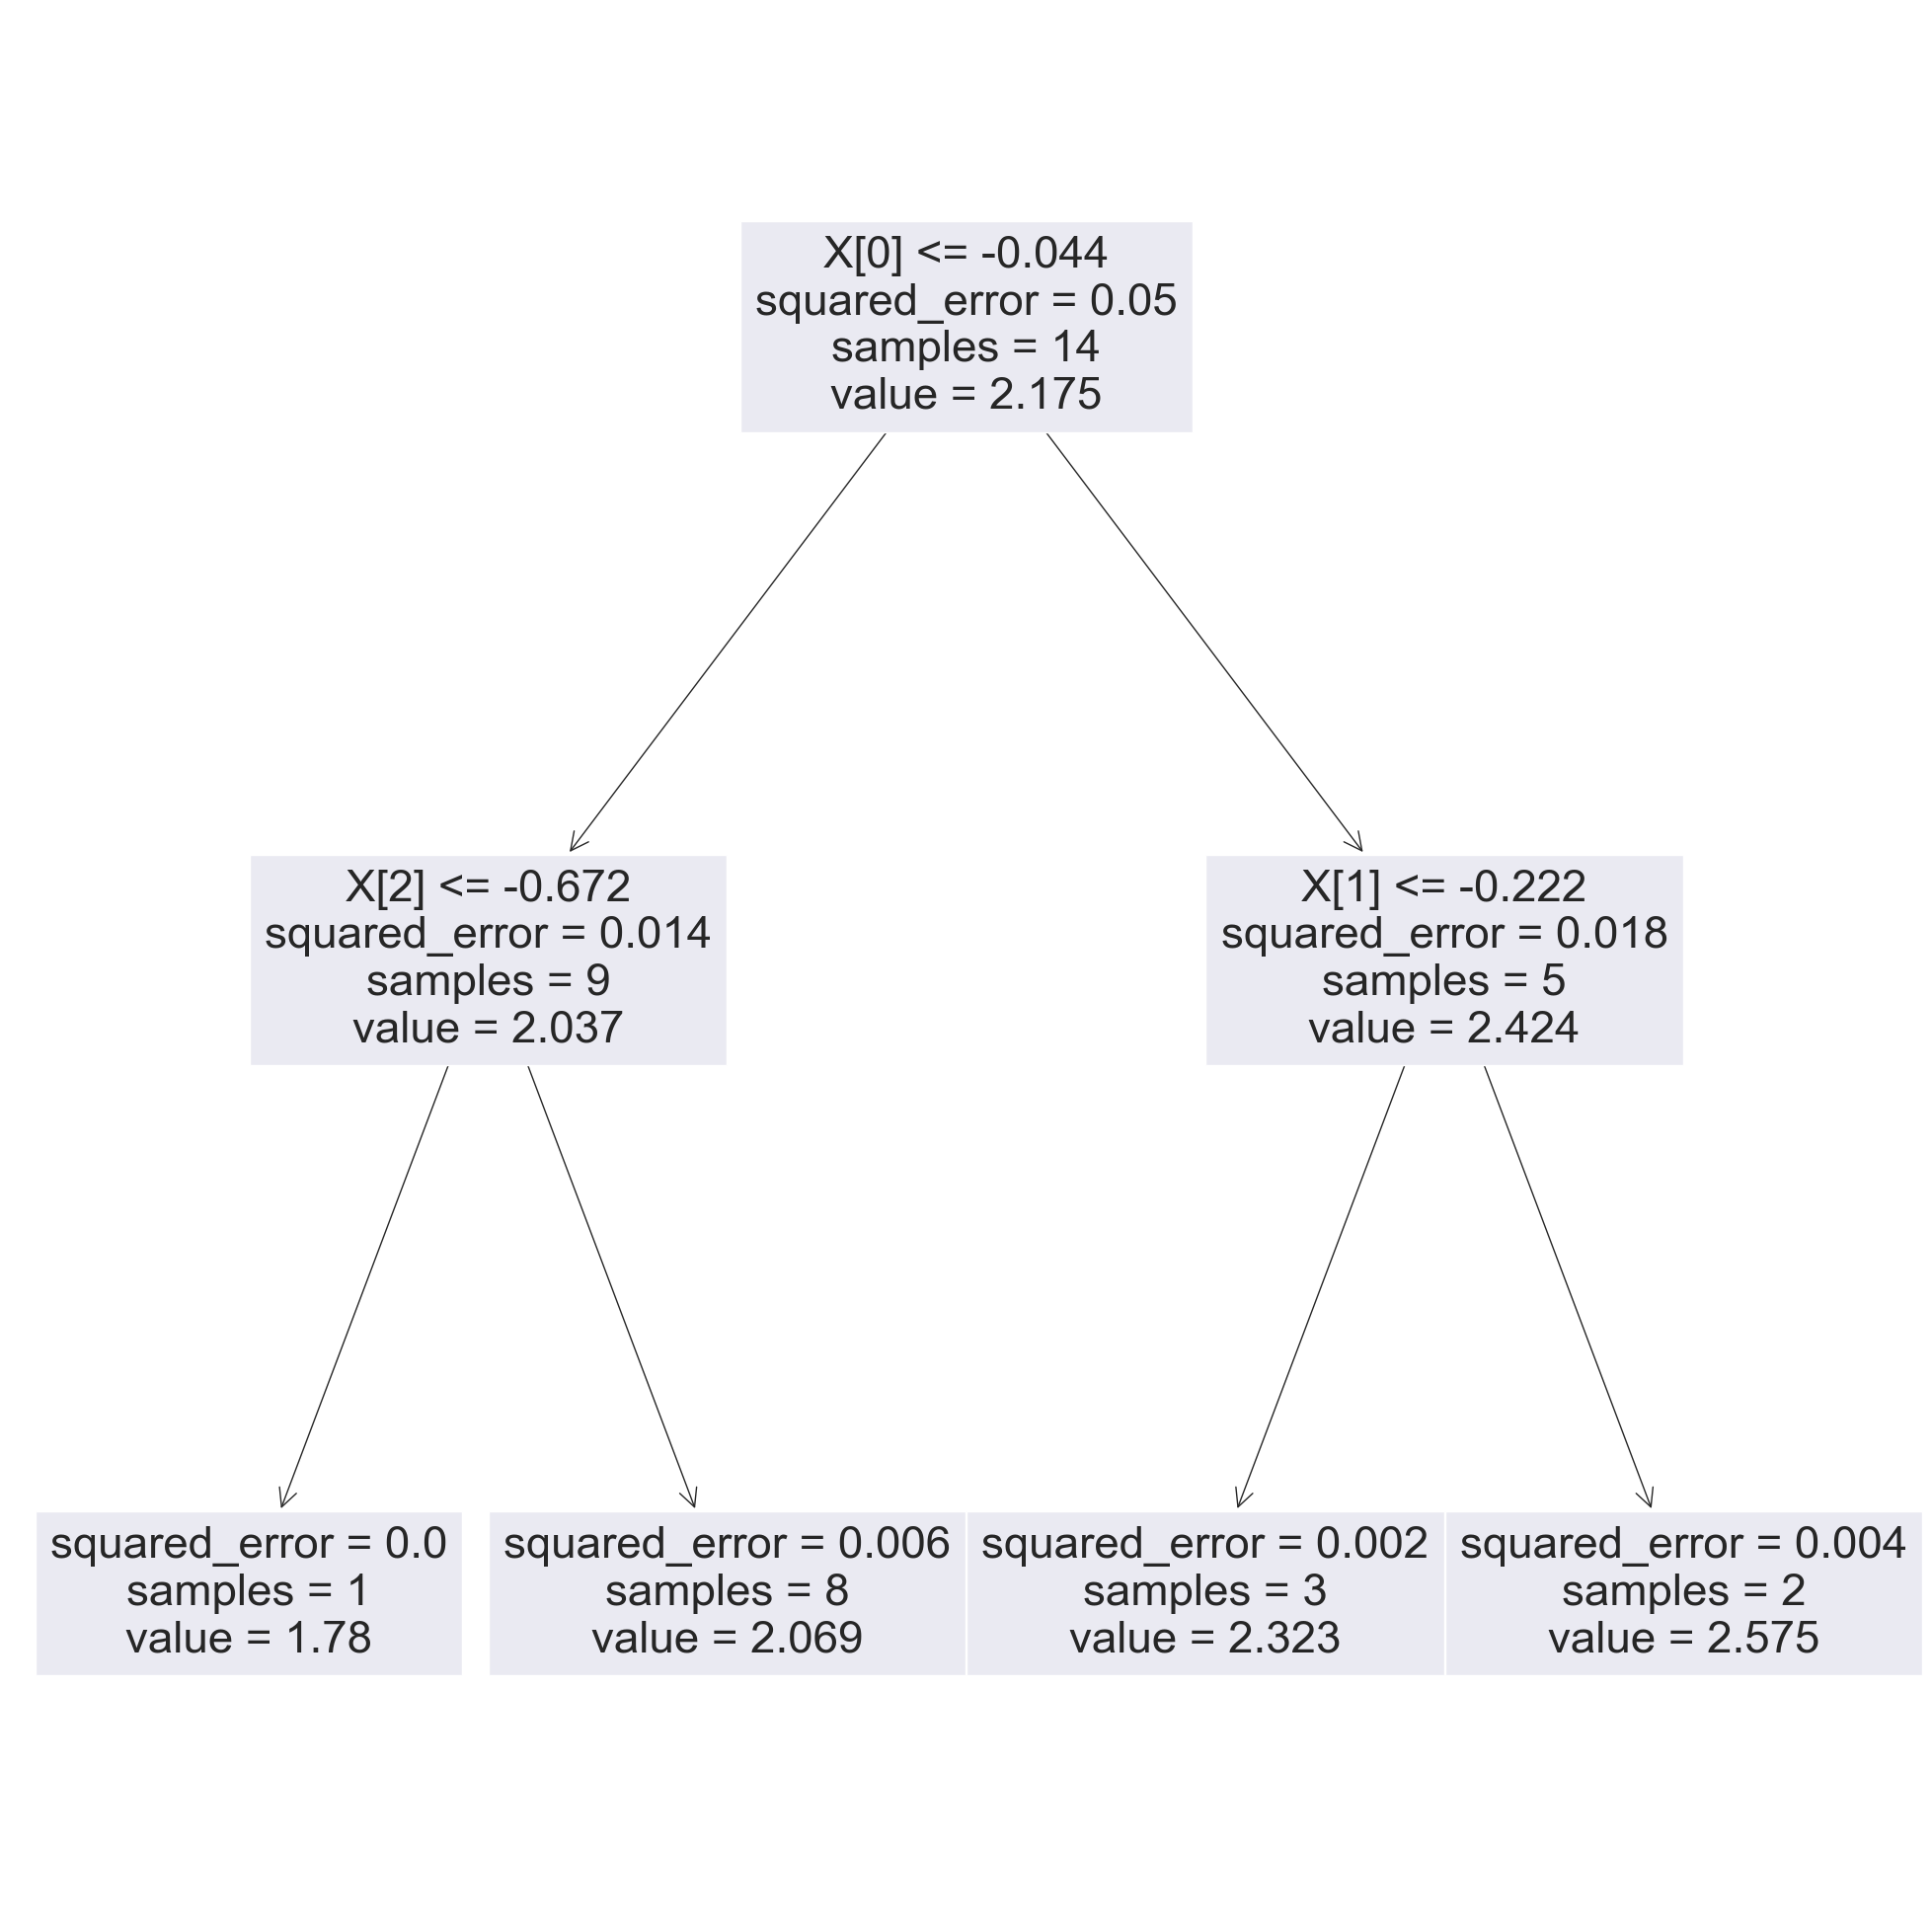

In [83]:
fig = plt.figure(figsize=(25,25))
tree.plot_tree(decisionTree)

### 2- Decision Tree Regression GridsearchCV

In [84]:
# Define the grid of hyperparameters to search over
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
# Create the decision tree regressor
gregressor = DecisionTreeRegressor()

# Create the grid search object
grid_search = GridSearchCV(gregressor, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print(grid_search.best_params_)
print("Best score:", grid_search.best_score_)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 8}
Best score: -0.13264173196585677


In [85]:
grid_search_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=2)
grid_search_reg.fit(X_train, y_train)
y_pred_grid_reg = grid_search_reg.predict(X_test)
# Calculate the mean squared error and r2 score
dgmse = mean_squared_error(y_test, y_pred_grid_reg)
dgr2 = r2_score(y_test, y_pred_grid_reg)
dgtrain_acc = grid_search_reg.score(X_train, y_train)
dgtest_acc = grid_search_reg.score(X_test, y_test)

print("Mean squared error:", dgmse)
print("r2 score:", dgr2)
print("Train accuracy:", dgtrain_acc)
print("Test accuracy:", dgtest_acc)

Mean squared error: 0.07156785714285718
r2 score: -0.1866624932322689
Train accuracy: 0.9229576624925462
Test accuracy: -0.1866624932322689


### 3-Linear Regression

In [86]:
# Define the grid of hyperparameters to search over
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi_reg = multi_reg.predict(X_test)
multi_reg_result = r2_score(y_test, y_pred_multi_reg)


# Calculate the mean squared error and r2 score
lmse = mean_squared_error(y_test, y_pred_multi_reg)
lr2 = r2_score(y_test, y_pred_multi_reg)
ltrain_acc = multi_reg.score(X_train, y_train)
ltest_acc = multi_reg.score(X_test, y_test)

print("Mean squared error:", lmse)
print("r2 score:", lr2)
print("Train accuracy:", ltrain_acc)
print("Test accuracy:", ltest_acc)

Mean squared error: 0.0006271109198539275
r2 score: 0.9896019101675547
Train accuracy: 0.9961935320599321
Test accuracy: 0.9896019101675547


### 4-Linear Regression GridsearchCV

In [87]:
param_grid = {'fit_intercept': [True, False],
              'positive': [True, False]}
grid_search_lr = GridSearchCV(multi_reg, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'fit_intercept': True, 'positive': True}


In [88]:
# Define the grid of hyperparameters to search over
multi_reg_grid = LinearRegression(fit_intercept = True, positive = False)
multi_reg_grid.fit(X_train, y_train)
y_pred_multi_reg_grid = multi_reg_grid.predict(X_test)
multi_reg_result_grid = r2_score(y_test, y_pred_multi_reg_grid)


# Calculate the mean squared error and r2 score
lgmse = mean_squared_error(y_test, y_pred_multi_reg_grid)
lgr2 = r2_score(y_test, y_pred_multi_reg_grid)
lgtrain_acc = multi_reg_grid.score(X_train, y_train)
lgtest_acc = multi_reg_grid.score(X_test, y_test)

print("Mean squared error:", lgmse)
print("r2 score:", lgr2)
print("Train accuracy:", lgtrain_acc)
print("Test accuracy:", lgtest_acc)

Mean squared error: 0.0006271109198539275
r2 score: 0.9896019101675547
Train accuracy: 0.9961935320599321
Test accuracy: 0.9896019101675547


In [89]:
result_table = pd.DataFrame({"Model":["Decision Tree Regression","Linear Regression"],
                            "MSE":[dmse,lmse],
                            "R2 Score":[dr2,lr2],
                            "Train Accuracy":[dtrain_acc,ltrain_acc],
                            "Test Accuracy":[dtest_acc,dtrain_acc]})
result_table.head()

,Model,MSE,R2 Score,Train Accuracy,Test Accuracy
0,Decision Tree Regression,0.051809,0.140965,0.904967,0.140965
1,Linear Regression,0.000627,0.989602,0.996194,0.904967


In [90]:
grid_search_table = result_table = pd.DataFrame({"Model":["Decision Tree Regression","Linear Regression"],
                            "MSE":[dgmse,lgmse],
                            "R2 Score":[dgr2,lgr2],
                            "Train Accuracy":[dgtrain_acc,lgtrain_acc],
                            "Test Accuracy":[dgtest_acc,dgtrain_acc]})
result_table.head()

,Model,MSE,R2 Score,Train Accuracy,Test Accuracy
0,Decision Tree Regression,0.071568,-0.186662,0.922958,-0.186662
1,Linear Regression,0.000627,0.989602,0.996194,0.922958
